## Here, we used new training data that has randomized dispersions and phases to try and predict the dispersion as well as the phase.


In [1]:
#Load packages
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import *

from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler  



## This function will plot the true vs. predicted with various line fits
def plotSummary(true, predicted, name):
    #from pylab import *
    #import numpy as np
    #import matplotlib.pyplot as plt
    
    figure()
    plt.scatter(true,predicted, alpha = 0.2)
    
    plt.title(name)
    plt.xlabel('True')
    plt.ylabel('Predicted')

    xmin, xmax = plt.xlim()
    plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one

    fit_temp = np.polyfit(true, predicted,1)
    xp = np.linspace(xmin, xmax, 100)
    p = np.poly1d(fit_temp)
    plt.plot(xp, p(xp), '-', color = 'black')
    
    print(' ')
    print('RMSE on test data:', np.sqrt(mean_squared_error(true, predicted)), 'for ', name)
    print('R^2 Score on test data:', r2_score(true, predicted), 'for', name)

    
    return

def myResiduals(testY, predictY):
    ## residuals 1
    i = 0 # resetting i
    iterations = len(testY) # gets number of dots/points
    residual_sum = 0 # initializes sum of residuals
    for i in range (0,iterations): # for every dot/point
       ys = testY # get ys of testing data
       ys = ys.values # take out indexing, data types, names
       y = ys[i]
       predict_ys = predictY.values # get ys of all dots/points
       predict_y = predict_ys[i] # get the y value of the dot/point at specfic x value i
       diff = y - predict_y # find the difference in height
       diff = abs(diff) # take the absolute value
       residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals
    residual_average = residual_sum/iterations # find the average of the residuals
    print('The average residual for predict:', round(residual_average,4)) # display average of residuals

    minY = min(ys) # find the minimum y value for testing data
    maxY = max(ys) # find the max y value for testing data
    minpredict = min(predictY) # find the min y value for the prediction data
    maxpredict = max(predictY) # find the max y value for the prediction data
    #print('minY', minY, 'maxY', maxY)
    #print('minpredict', minpredict, 'maxpredict', maxpredict)
    rangeY = minY + maxY # find the range of the testing data
    rangepredict = minpredict - maxpredict # find the range of the predictions
    #print('rangeY', rangeY)
    #print('rangepredict', rangepredict)
    residual_percent_rangepredict = (residual_average/abs(rangepredict))*100 # calculate what percent the residual is of the range
    print('Residual is this percent of predict range', round(residual_percent_rangepredict,3), '%')
    
    return
    

In [2]:
#Load the training data


peak_names = ['peak1', 'peak2', 'peak3', 'peak4']
locs_names = ['loc1', 'loc2', 'loc3', 'loc4']
width_names = ['width1', 'width2', 'width3','width4']
prom_names = ['prom1', 'prom2', 'prom3', 'prom4']

energy = (pd.read_csv('Training_Data/Hexagon/HexagonBias_v4.csv', header=None)*1000).round().astype(int)
energy_names = ['E_%i_mV' % item for item in list(energy.T[0])]

col_names2 = ['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha']+ peak_names + locs_names + width_names + prom_names

col_names1 = ['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'] + energy_names

data1 = pd.read_csv('Training_Data/Hexagon/HexagonTrainingData062718_v9_specPoints.csv', header = None, names = col_names1)
data2 = pd.read_csv('Training_Data/Hexagon/HexagonTrainingData062718_v9_peakinfo.csv', header = None, names = col_names2)


X1 = data1.drop(['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'], axis = 1)
Y1 = data1[['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha']]

X2 = data2.drop(['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'], axis = 1)
Y2 = data2[['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha']]

ts1 = 0.3
rs1 = 42

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = ts1, random_state = rs1)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = ts1, random_state = rs1)

data1.head()

deltaI    deltaR      E_0    mstar   alpha  E_-400_mV  E_-398_mV  \
0  0.81472 -0.147980  0.41370  0.43701 -8.6764    3.26000   9.882200   
1  0.09754 -1.133300  0.45569  0.44363 -5.3511    0.05461   0.065858   
2  0.15761 -0.046193  0.49672  0.37281 -6.9972    1.59930   1.433100   
3  0.14189 -0.908300  0.49257  0.41883 -5.4051    0.26500   0.202940   
4  0.65574 -1.514700  0.48591  0.44010 -8.2126    1.26620   0.866940   

   E_-396_mV  E_-394_mV  E_-392_mV    ...     E_482_mV  E_484_mV  E_486_mV  \
0   2.334900    0.90287    0.50180    ...      0.62323   0.62371   0.62546   
1   0.081225    0.10324    0.13743    ...      0.12581   0.12903   0.13200   
2   1.286000    1.15800    1.04800    ...      1.01510   1.01320   1.01100   
3   0.161420    0.13384    0.11383    ...      0.15534   0.15561   0.15664   
4   0.637450    0.49386    0.39818    ...      1.21800   1.23370   1.25490   

   E_488_mV  E_490_mV  E_492_mV  E_494_mV  E_496_mV  E_498_mV  E_500_mV  
0   0.62839   0.63288   0.63869   0.64565   0.65423   0.66432   0.67559  
1   0.13683   0.14167   0.14810   0.15516   0.16464   0.17402   0.18740  
2   1.00870   1.00640   1.00370   1.00110   0.99801   0.99497   0.99171  
3   0.15788   0.15934   0.16199   0.16514   0.16840   0.17335   0.17833  
4   1.28390   1.32290   1.36940   1.42420   1.48600   1.55150   1.61830  

[5 rows x 456 columns]

In [3]:
data2.head()

deltaI    deltaR      E_0    mstar   alpha    peak1    peak2    peak3  \
0  0.81472 -0.147980  0.41370  0.43701 -8.6764   9.8822   5.5667   3.6113   
1  0.09754 -1.133300  0.45569  0.44363 -5.3511  18.0630  16.8260  12.9150   
2  0.15761 -0.046193  0.49672  0.37281 -6.9972   1.7381   1.4604   1.2477   
3  0.14189 -0.908300  0.49257  0.41883 -5.4051  14.0020  12.3480   8.9410   
4  0.65574 -1.514700  0.48591  0.44010 -8.2126   5.8682   4.4592   3.2560   

    peak4   loc1   ...      loc3   loc4    width1    width2    width3  \
0  2.7913 -0.398   ...    -0.232 -0.084  0.001877  0.009717  0.019692   
1  9.8592 -0.378   ...    -0.124  0.072  0.003477  0.004698  0.007322   
2  1.1347 -0.292   ...     0.110  0.386  0.042705  0.056824  0.079090   
3  6.3451 -0.304   ...     0.060  0.308  0.005644  0.007879  0.010993   
4  2.4006 -0.302   ...     0.038  0.262  0.012698  0.019628  0.026555   

     width4    prom1     prom2     prom3    prom4  
0  0.029163   6.6222   5.34590   3.23250  2.25190  
1  0.009501  18.0080  16.74500  12.80400  9.73970  
2  0.080406   1.0521   0.62049   0.36429  0.14303  
3  0.014262  13.9150  12.22200   8.78560  6.14070  
4  0.032085   5.6336   4.10670   2.83680  1.88050  

[5 rows x 21 columns]

## Using the Best Models on the Hexagon Data - specPoints

### Statsmodels - specPoints

 
RMSE on test data: 1.1556678827277582 for  Delta I
R^2 Score on test data: -14.906706920118765 for Delta I
 
RMSE on test data: 0.6806914558975969 for  Delta R
R^2 Score on test data: -1.2937836041209696 for Delta R
 
RMSE on test data: 0.6806914558975969 for  Delta R Zoomed In
R^2 Score on test data: -1.2937836041209696 for Delta R Zoomed In
 
RMSE on test data: 0.06193691533620863 for  E_0
R^2 Score on test data: -3.5662444879924067 for E_0
 
RMSE on test data: 0.09504406105898644 for  m star
R^2 Score on test data: -3.7489553243161655 for m star
 
RMSE on test data: 12.96948685271914 for  alpha
R^2 Score on test data: -19.37283557733294 for alpha
The average residual for predict: 0.3203
Residual is this percent of predict range 0.526 %
The average residual for predict: 0.4262
Residual is this percent of predict range 1.641 %


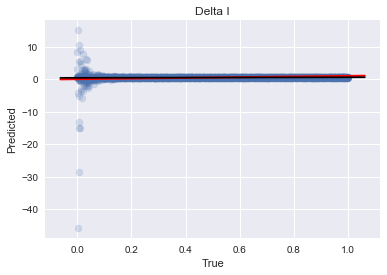

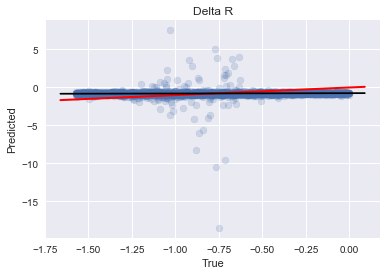

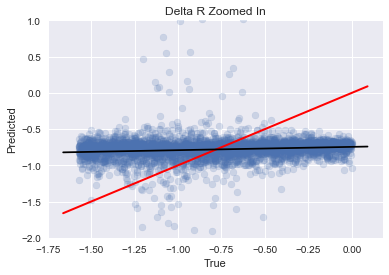

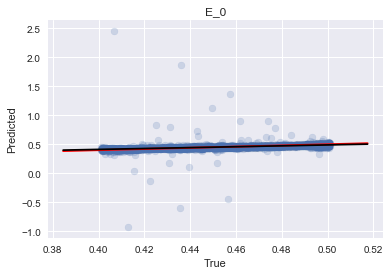

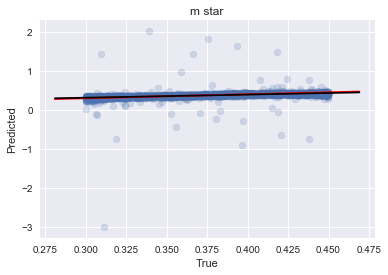

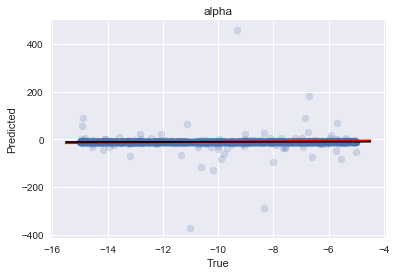

In [4]:
#Initialize and fit OLS model for deltaI 
model_OLS_I_sp = sm.OLS(Y1_train['deltaI'], X1_train)
model_OLS_R_sp = sm.OLS(Y1_train['deltaR'], X1_train)
model_OLS_E0_sp = sm.OLS(Y1_train['E_0'], X1_train)
model_OLS_mstar_sp = sm.OLS(Y1_train['mstar'], X1_train)
model_OLS_alpha_sp = sm.OLS(Y1_train['alpha'], X1_train)

results_OLS_I_sp = model_OLS_I_sp.fit()
results_OLS_R_sp = model_OLS_R_sp.fit()
results_OLS_E0_sp = model_OLS_E0_sp.fit()
results_OLS_mstar_sp = model_OLS_mstar_sp.fit()
results_OLS_alpha_sp = model_OLS_alpha_sp.fit()

#Make predictions on testing data
predictions_OLS_I_sp = results_OLS_I_sp.predict(X1_test) # make the predictions by the model
predictions_OLS_R_sp = results_OLS_R_sp.predict(X1_test)
predictions_OLS_E0_sp = results_OLS_E0_sp.predict(X1_test)
predictions_OLS_mstar_sp = results_OLS_mstar_sp.predict(X1_test)
predictions_OLS_alpha_sp = results_OLS_alpha_sp.predict(X1_test)

scores_OLS = [r2_score(Y1_test['deltaI'], predictions_OLS_I_sp), r2_score(Y1_test['deltaR'], predictions_OLS_R_sp), r2_score(Y1_test['E_0'], predictions_OLS_E0_sp), r2_score(Y1_test['mstar'], predictions_OLS_mstar_sp),r2_score(Y1_test['alpha'], predictions_OLS_alpha_sp) ]

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y1_test['deltaI'], predictions_OLS_I_sp,'Delta I')
#ylim([-1,5])
plotSummary(Y1_test['deltaR'], predictions_OLS_R_sp, 'Delta R')
plotSummary(Y1_test['deltaR'], predictions_OLS_R_sp, 'Delta R Zoomed In')
ylim([-2,1])
plotSummary(Y1_test['E_0'], predictions_OLS_E0_sp, 'E_0')
plotSummary(Y1_test['mstar'], predictions_OLS_mstar_sp, 'm star')
plotSummary(Y1_test['alpha'], predictions_OLS_alpha_sp, 'alpha')

myResiduals(Y1_test['deltaI'], predictions_OLS_I_sp)
myResiduals(Y1_test['deltaR'], predictions_OLS_R_sp)



### Decision Tree - specPoints

 
RMSE on test data: 0.25346119407198614 for  deltaI Depth 60
R^2 Score on test data: 0.2348666280489624 for deltaI Depth 60
 
RMSE on test data: 0.36691045443162396 for  deltaR Depth 60
R^2 Score on test data: 0.33354317759505425 for deltaR Depth 60
 
RMSE on test data: 0.018509583332061885 for  E_0
R^2 Score on test data: 0.5921942908705966 for E_0
 
RMSE on test data: 0.027365146947050036 for  mstar
R^2 Score on test data: 0.6063196991870993 for mstar
 
RMSE on test data: 2.7164066062781895 for  alpha
R^2 Score on test data: 0.10629240307275323 for alpha
 
Regression - Decision Tree -  Score:  0.11308678096311243 , using max depth of 30
 
Cross Validation Scores for regressor with max depth of  30  :  [0.34948971 0.36686406 0.31097884 0.28248218 0.30419361 0.27060054
 0.25353741 0.26083467 0.20853383 0.2357081 ]


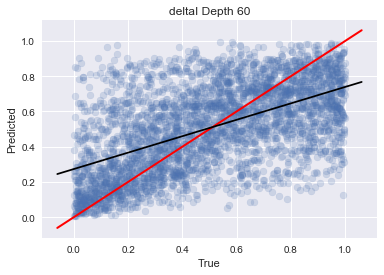

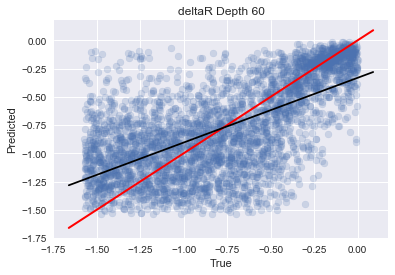

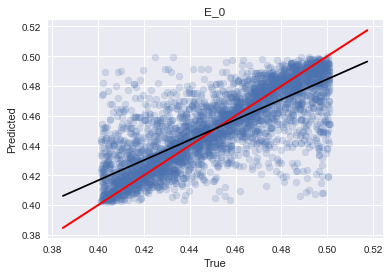

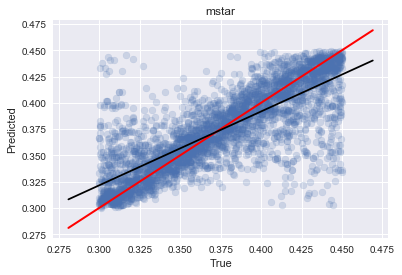

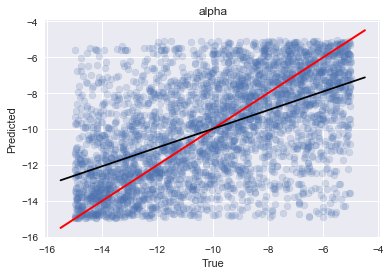

In [5]:
#Initialize the model
rs = 42
regr_DT_sp = DecisionTreeRegressor(max_depth=60, min_samples_leaf = 2, random_state = rs)

#Fit the model
regr_DT_sp = regr_DT_sp.fit(X1_train, Y1_train)


#print(data1[data1['Regr - DT']>0.001])

#Use model to predict
predictions_DT_sp = regr_DT_sp.predict(X1_test)

scores_DT = [r2_score(Y1_test['deltaI'], predictions_DT_sp[:,0]), r2_score(Y1_test['deltaR'], predictions_DT_sp[:,1]),r2_score(Y1_test['E_0'], predictions_DT_sp[:,2]), r2_score(Y1_test['mstar'], predictions_DT_sp[:,3]), r2_score(Y1_test['alpha'], predictions_DT_sp[:,4]) ]

#Plot results
plotSummary(Y1_test['deltaI'], predictions_DT_sp[:,0], 'deltaI Depth 60')
#myResiduals(Y_test['deltaI'], y_3[:,0])
plotSummary(Y1_test['deltaR'], predictions_DT_sp[:,1], 'deltaR Depth 60')
#myResiduals(Y_test['deltaR'], y_3[:,1])
plotSummary(Y1_test['E_0'], predictions_DT_sp[:,2], 'E_0')
plotSummary(Y1_test['mstar'], predictions_DT_sp[:,3], 'mstar')
plotSummary(Y1_test['alpha'], predictions_DT_sp[:,4], 'alpha')

print(' ')

#Trying to understand the scoring
print('Regression - Decision Tree -  Score: ', regr_DT_sp.score(X1_test,Y1_test),', using max depth of 30')
print(' ')
regressor = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
print( 'Cross Validation Scores for regressor with max depth of ', regressor.max_depth, ' : ', cross_val_score(regressor, X1, Y1, cv=10))

### Random Forest - specPoints


Score - Random Forest: 0.5980509831859119 for delta I/R 10
 
RMSE on test data: 0.18181834104154124 for  deltaI 10
R^2 Score on test data: 0.606278099204129 for deltaI 10
 
RMSE on test data: 0.2520577189056307 for  deltaR 10
R^2 Score on test data: 0.6854774061072131 for deltaR 10
 
RMSE on test data: 0.010506253920221652 for  E0
R^2 Score on test data: 0.8686119696510906 for E0
 
RMSE on test data: 0.01448726734281917 for  mstar
R^2 Score on test data: 0.8896630273995754 for mstar
 
RMSE on test data: 1.826967563537378 for  alpha
R^2 Score on test data: 0.5957336742343076 for alpha


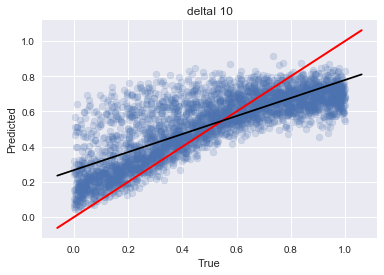

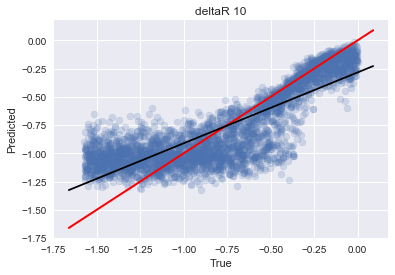

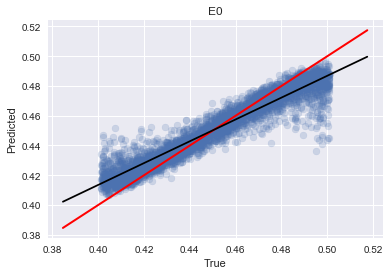

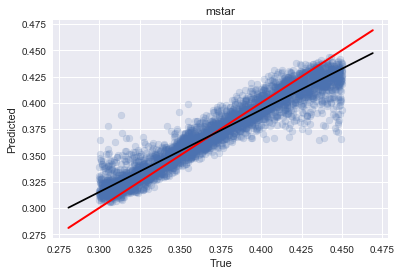

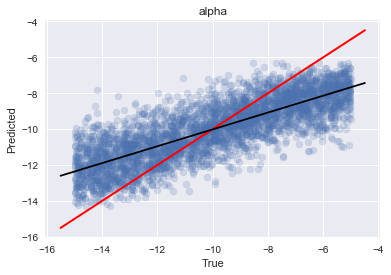

In [6]:
rs = 42
regr_RF_sp = RandomForestRegressor(max_depth = 40, n_estimators = 30, random_state=rs)

model_RF_sp = regr_RF_sp.fit(X1_train, Y1_train)

predictions_RF_sp = model_RF_sp.predict(X1_test)

scores_RF = [r2_score(Y1_test['deltaI'], predictions_RF_sp[:,0]), r2_score(Y1_test['deltaR'], predictions_RF_sp[:,1]), r2_score(Y1_test['E_0'], predictions_RF_sp[:,2]), r2_score(Y1_test['mstar'], predictions_RF_sp[:,3]), r2_score(Y1_test['alpha'], predictions_RF_sp[:,4])]

print('')
print('Score - Random Forest:' , model_RF_sp.score(X1_test, Y1_test), 'for delta I/R 10')

plotSummary(Y1_test['deltaI'], predictions_RF_sp[:,0], 'deltaI 10')
plotSummary(Y1_test['deltaR'], predictions_RF_sp[:,1], 'deltaR 10')
plotSummary(Y1_test['E_0'], predictions_RF_sp[:,2], 'E0')
plotSummary(Y1_test['mstar'], predictions_RF_sp[:,3], 'mstar')
plotSummary(Y1_test['alpha'], predictions_RF_sp[:,4], 'alpha')



### Independent Random Forests - specPoints


Score - Random Forest: 0.7388815009573555 for delta I/R 10
 
RMSE on test data: 0.22966398576063202 for  deltaI 10
R^2 Score on test data: 0.7388815009573554 for deltaI 10
 
RMSE on test data: 0.14703520347549878 for  deltaR 10
R^2 Score on test data: 0.7425120881684903 for deltaR 10
 
RMSE on test data: 0.0037845655980130177 for  E_0
R^2 Score on test data: 0.98295126771875 for E_0
 
RMSE on test data: 0.00946213624084815 for  mstar
R^2 Score on test data: 0.9529319172166584 for mstar
 
RMSE on test data: 1.768077611407698 for  alpha
R^2 Score on test data: 0.6213756477330679 for alpha


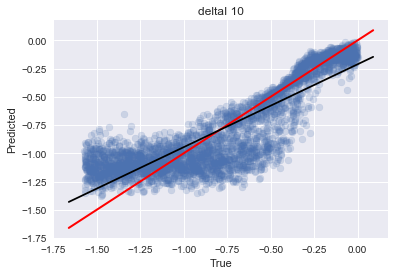

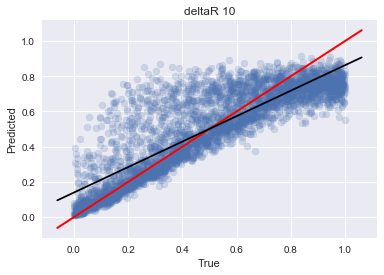

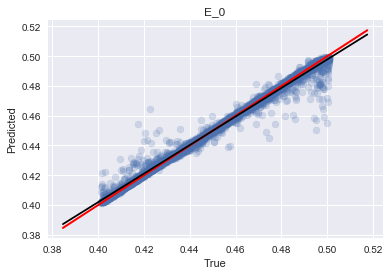

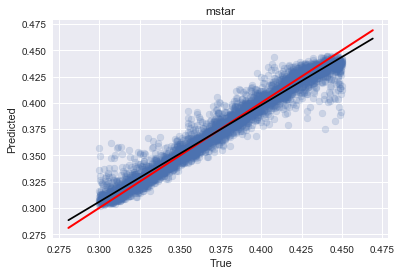

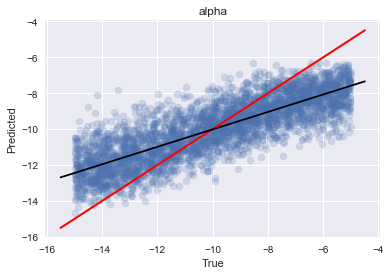

In [7]:
#Trying Independent Random Forest

rs = 42
md = 40
n = 40

regr_RF2_dr_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_di_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_E0_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_mstar_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_alpha_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)


model_RF2_dr_sp = regr_RF2_dr_sp.fit(X1_train, Y1_train['deltaR'])
model_RF2_di_sp = regr_RF2_di_sp.fit(X1_train, Y1_train['deltaI'])
model_RF2_E0_sp = regr_RF2_E0_sp.fit(X1_train, Y1_train['E_0'])
model_RF2_mstar_sp = regr_RF2_mstar_sp.fit(X1_train, Y1_train['mstar'])
model_RF2_alpha_sp = regr_RF2_alpha_sp.fit(X1_train, Y1_train['alpha'])

predictions_RF2_dr_sp = model_RF2_dr_sp.predict(X1_test)
predictions_RF2_di_sp = model_RF2_di_sp.predict(X1_test)
predictions_RF2_E0_sp = model_RF2_E0_sp.predict(X1_test)
predictions_RF2_mstar_sp = model_RF2_mstar_sp.predict(X1_test)
predictions_RF2_alpha_sp = model_RF2_alpha_sp.predict(X1_test)

scores_RF2 = [r2_score(Y1_test['deltaI'], predictions_RF2_di_sp), r2_score(Y1_test['deltaR'], predictions_RF2_dr_sp), r2_score(Y1_test['E_0'], predictions_RF2_E0_sp), r2_score(Y1_test['mstar'], predictions_RF2_mstar_sp), r2_score(Y1_test['alpha'], predictions_RF2_alpha_sp)]

#importance_RF_10 = pd.Series(model_RF2.feature_importances_, index = X_train.columns)

print('')
print('Score - Random Forest:' , model_RF2_dr_sp.score(X1_test, Y1_test['deltaR']), 'for delta I/R 10')

plotSummary(Y1_test['deltaR'], predictions_RF2_dr_sp, 'deltaI 10')
plotSummary(Y1_test['deltaI'], predictions_RF2_di_sp, 'deltaR 10')
plotSummary(Y1_test['E_0'], predictions_RF2_E0_sp, 'E_0')
plotSummary(Y1_test['mstar'], predictions_RF2_mstar_sp, 'mstar')
plotSummary(Y1_test['alpha'], predictions_RF2_alpha_sp, 'alpha')



### AdaBoost Random Forest - specPoints

 
RMSE on test data: 0.15463547869416025 for  AdaBoost Delta I
R^2 Score on test data: 0.7152049230798889 for AdaBoost Delta I
 
RMSE on test data: 0.23869157818987116 for  AdaBoost Delta R
R^2 Score on test data: 0.7179500433228341 for AdaBoost Delta R
 
RMSE on test data: 0.0029147979642042457 for  AdaBoost E_0
R^2 Score on test data: 0.9898870716211117 for AdaBoost E_0
 
RMSE on test data: 0.008591692039688771 for  AdaBoost mstar
R^2 Score on test data: 0.9611934067775739 for AdaBoost mstar
 
RMSE on test data: 1.8188255419603212 for  AdaBoost alpha
R^2 Score on test data: 0.5993289330671967 for AdaBoost alpha
Delta I AdaBoost Score: 0.7152049230798889
Delta R AdaBoost Score: 0.7179500433228341


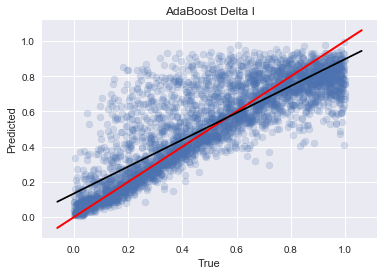

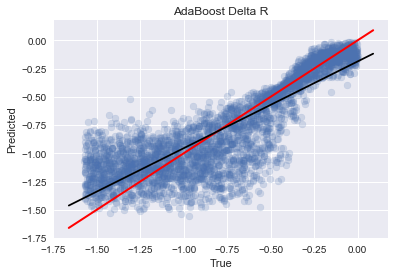

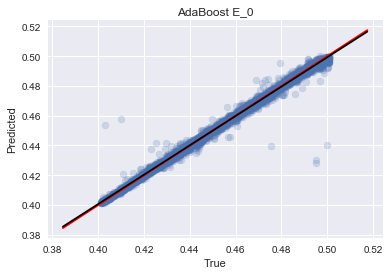

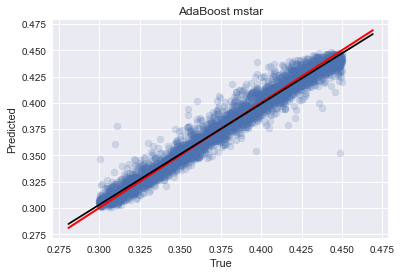

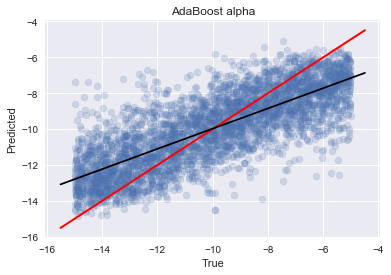

In [8]:
#Using AdaBoost Regression

from sklearn.ensemble import AdaBoostRegressor

rng = 42
md = 30
nest2 = 15

regr_AB_di_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators=nest2, random_state=rng)
regr_AB_dr_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md),n_estimators=nest2, random_state=rng)
regr_AB_E0_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)
regr_AB_mstar_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)
regr_AB_alpha_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)

model_AB_di_sp = regr_AB_di_sp.fit(X1_train, Y1_train['deltaI'])
model_AB_dr_sp = regr_AB_dr_sp.fit(X1_train, Y1_train['deltaR'])
model_AB_E0_sp = regr_AB_E0_sp.fit(X1_train, Y1_train['E_0'])
model_AB_mstar_sp = regr_AB_mstar_sp.fit(X1_train, Y1_train['mstar'])
model_AB_alpha_sp = regr_AB_alpha_sp.fit(X1_train, Y1_train['alpha'])

predictions_AB_di_sp = model_AB_di_sp.predict(X1_test)
predictions_AB_dr_sp = model_AB_dr_sp.predict(X1_test)
predictions_AB_E0_sp = model_AB_E0_sp.predict(X1_test)
predictions_AB_mstar_sp = model_AB_mstar_sp.predict(X1_test)
predictions_AB_alpha_sp = model_AB_alpha_sp.predict(X1_test)

scores_AB = [r2_score(Y1_test['deltaI'], predictions_AB_di_sp), r2_score(Y1_test['deltaR'], predictions_AB_dr_sp), r2_score(Y1_test['E_0'], predictions_AB_E0_sp), r2_score(Y1_test['mstar'], predictions_AB_mstar_sp), r2_score(Y1_test['alpha'], predictions_AB_alpha_sp)]

plotSummary(Y1_test['deltaI'], predictions_AB_di_sp, 'AdaBoost Delta I')
plotSummary(Y1_test['deltaR'], predictions_AB_dr_sp, 'AdaBoost Delta R')
plotSummary(Y1_test['E_0'], predictions_AB_E0_sp, 'AdaBoost E_0')
plotSummary(Y1_test['mstar'], predictions_AB_mstar_sp, 'AdaBoost mstar')
plotSummary(Y1_test['alpha'], predictions_AB_alpha_sp, 'AdaBoost alpha')

print('Delta I AdaBoost Score:', model_AB_di_sp.score(X1_test, Y1_test['deltaI']))
print('Delta R AdaBoost Score:', model_AB_dr_sp.score(X1_test, Y1_test['deltaR']))


### Gradient Boosting Random Forest - specPoints

In [9]:
# Using Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

rng = 42

md = 50
nest2 = 30


regr_GB_di_sp = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_dr_sp = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_E0_sp = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)
regr_GB_mstar_sp = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)
regr_GB_alpha_sp = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)



In [10]:
model_GB_di_sp = regr_GB_di_sp.fit(X1_train, Y1_train['deltaI'])


In [11]:
model_GB_dr_sp = regr_GB_dr_sp.fit(X1_train, Y1_train['deltaR'])


In [12]:
model_GB_E0_sp = regr_GB_E0_sp.fit(X1_train, Y1_train['E_0'])

In [13]:
model_GB_mstar_sp = regr_GB_mstar_sp.fit(X1_train, Y1_train['mstar'])

In [14]:
model_GB_alpha_sp = regr_GB_alpha_sp.fit(X1_train, Y1_train['alpha'])

 
RMSE on test data: 0.18641500335341396 for  GradientBoost Delta I
R^2 Score on test data: 0.5861185923642314 for GradientBoost Delta I
 
RMSE on test data: 0.2968923863421757 for  GradientBoost Delta R
R^2 Score on test data: 0.5636349427439136 for GradientBoost Delta R
 
RMSE on test data: 0.0047760161326761115 for  GradientBoost E_0
R^2 Score on test data: 0.972848640088463 for GradientBoost E_0
 
RMSE on test data: 0.01359968624530172 for  GradientBoost mstar
R^2 Score on test data: 0.9027687447086226 for GradientBoost mstar
 
RMSE on test data: 2.489401733866911 for  GradientBoost alpha
R^2 Score on test data: 0.24942193382611066 for GradientBoost alpha
Delta I Gradient Boost Score: 0.5861185923642314
Delta R Gradient Boost Score: 0.5636349427439136


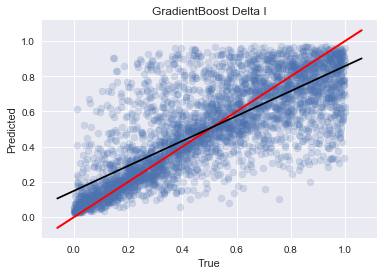

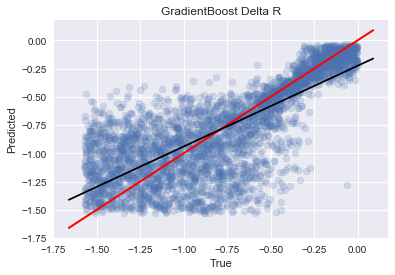

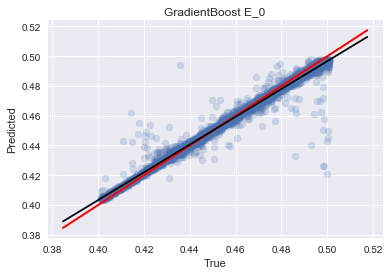

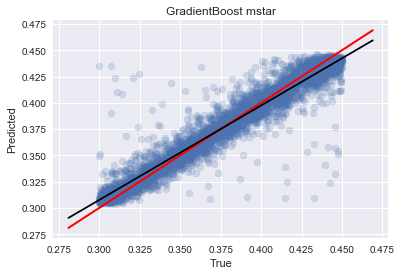

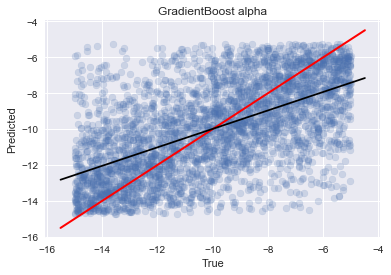

In [15]:
predictions_GB_di_sp = model_GB_di_sp.predict(X1_test)
predictions_GB_dr_sp = model_GB_dr_sp.predict(X1_test)
predictions_GB_E0_sp = model_GB_E0_sp.predict(X1_test)
predictions_GB_mstar_sp = model_GB_mstar_sp.predict(X1_test)
predictions_GB_alpha_sp = model_GB_alpha_sp.predict(X1_test)

scores_GB = [r2_score(Y1_test['deltaI'], predictions_GB_di_sp), r2_score(Y1_test['deltaR'], predictions_GB_dr_sp), r2_score(Y1_test['E_0'], predictions_GB_E0_sp), r2_score(Y1_test['mstar'], predictions_GB_mstar_sp), r2_score(Y1_test['alpha'], predictions_GB_alpha_sp)]

plotSummary(Y1_test['deltaI'], predictions_GB_di_sp, 'GradientBoost Delta I')
plotSummary(Y1_test['deltaR'], predictions_GB_dr_sp, 'GradientBoost Delta R')
plotSummary(Y1_test['E_0'], predictions_GB_E0_sp, 'GradientBoost E_0')
plotSummary(Y1_test['mstar'], predictions_GB_mstar_sp, 'GradientBoost mstar')
plotSummary(Y1_test['alpha'], predictions_GB_alpha_sp, 'GradientBoost alpha')



print('Delta I Gradient Boost Score:', model_GB_di_sp.score(X1_test, Y1_test['deltaI']))
print('Delta R Gradient Boost Score:', model_GB_dr_sp.score(X1_test, Y1_test['deltaR']))


## Using the best models on the Hexagon data - peak info

### Statsmodels - peak info

 
RMSE on test data: 0.23603858213143758 for  Delta I
R^2 Score on test data: 0.3364400193026921 for Delta I
 
RMSE on test data: 0.3068264168459187 for  Delta R
R^2 Score on test data: 0.533944816990081 for Delta R
 
RMSE on test data: 0.3068264168459187 for  Delta R Zoomed In
R^2 Score on test data: 0.533944816990081 for Delta R Zoomed In
 
RMSE on test data: 0.01666031427437437 for  E_0
R^2 Score on test data: 0.6696103791735911 for E_0
 
RMSE on test data: 0.03216746013400702 for  mstar
R^2 Score on test data: 0.45602159726069535 for mstar
 
RMSE on test data: 2.838941507362516 for  alpha
R^2 Score on test data: 0.0238450008284391 for alpha
The average residual for predict: 0.1911
Residual is this percent of predict range 6.105 %
The average residual for predict: 0.2469
Residual is this percent of predict range 7.387 %


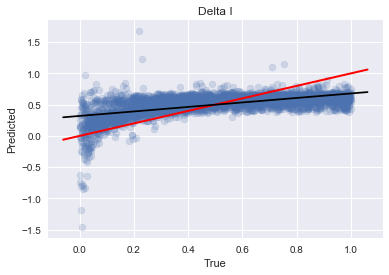

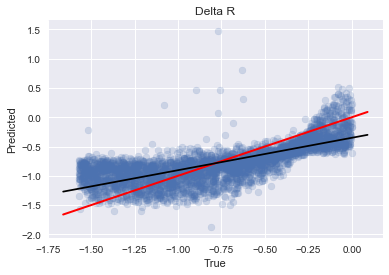

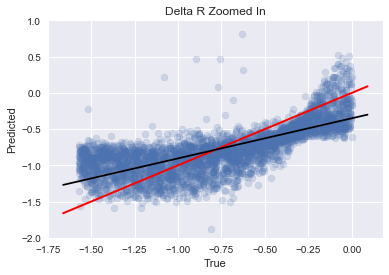

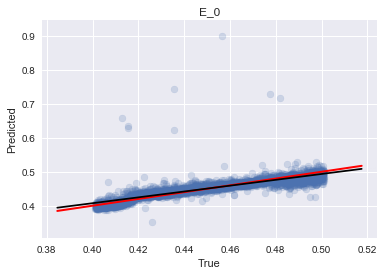

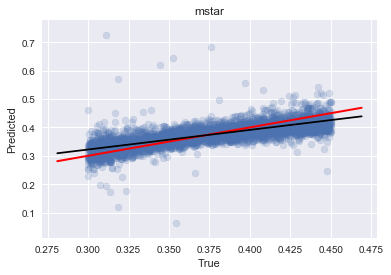

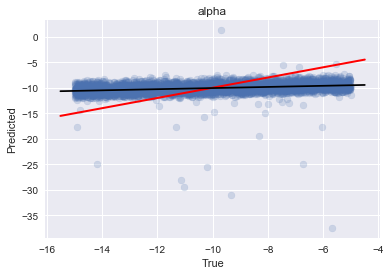

In [16]:
#Initialize and fit OLS model for deltaI 
model_OLS_I_pi = sm.OLS(Y2_train['deltaI'], X2_train)
model_OLS_R_pi = sm.OLS(Y2_train['deltaR'], X2_train)
model_OLS_E0_pi = sm.OLS(Y2_train['E_0'], X2_train)
model_OLS_mstar_pi = sm.OLS(Y2_train['mstar'], X2_train)
model_OLS_alpha_pi = sm.OLS(Y2_train['alpha'], X2_train)

results_OLS_I_pi = model_OLS_I_pi.fit()
results_OLS_R_pi = model_OLS_R_pi.fit()
results_OLS_E0_pi = model_OLS_E0_pi.fit()
results_OLS_mstar_pi = model_OLS_mstar_pi.fit()
results_OLS_alpha_pi = model_OLS_alpha_pi.fit()

#Make predictions on testing data
predictions_OLS_I_pi = results_OLS_I_pi.predict(X2_test) # make the predictions by the model
predictions_OLS_R_pi = results_OLS_R_pi.predict(X2_test)
predictions_OLS_E0_pi = results_OLS_E0_pi.predict(X2_test)
predictions_OLS_mstar_pi = results_OLS_mstar_pi.predict(X2_test)
predictions_OLS_alpha_pi = results_OLS_alpha_pi.predict(X2_test)

scores_OLS_pi = [r2_score(Y2_test['deltaI'], predictions_OLS_I_pi), r2_score(Y2_test['deltaR'], predictions_OLS_R_pi), r2_score(Y2_test['E_0'], predictions_OLS_E0_pi), r2_score(Y2_test['mstar'], predictions_OLS_mstar_pi), r2_score(Y2_test['alpha'], predictions_OLS_alpha_pi)]

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y2_test['deltaI'], predictions_OLS_I_pi,'Delta I')
#ylim([-1,5])
plotSummary(Y2_test['deltaR'], predictions_OLS_R_pi, 'Delta R')
plotSummary(Y2_test['deltaR'], predictions_OLS_R_pi, 'Delta R Zoomed In')
ylim([-2,1])

plotSummary(Y2_test['E_0'], predictions_OLS_E0_pi, 'E_0')
plotSummary(Y2_test['mstar'], predictions_OLS_mstar_pi, 'mstar')
plotSummary(Y2_test['alpha'], predictions_OLS_alpha_pi, 'alpha')

myResiduals(Y2_test['deltaI'], predictions_OLS_I_pi)
myResiduals(Y2_test['deltaR'], predictions_OLS_R_pi)



### Decision Tree - peak info

 
RMSE on test data: 0.1721403308762214 for  deltaI Depth 60
R^2 Score on test data: 0.6470774095768962 for deltaI Depth 60
 
RMSE on test data: 0.26858992749921823 for  deltaR Depth 60
R^2 Score on test data: 0.6428659248637407 for deltaR Depth 60
 
RMSE on test data: 0.019257686808506005 for  E_0 DT pi
R^2 Score on test data: 0.55856348422978 for E_0 DT pi
 
RMSE on test data: 0.021856047054293833 for  mstar DT pi
R^2 Score on test data: 0.7488741910741697 for mstar DT pi
 
RMSE on test data: 2.9746350467344267 for  alpha
R^2 Score on test data: -0.07170010810678162 for alpha
 
Regression - Decision Tree -  Score:  -0.0475013943936479 , using max depth of 30
 
Cross Validation Scores for regressor with max depth of  30  :  [0.34948971 0.36686406 0.31097884 0.28248218 0.30419361 0.27060054
 0.25353741 0.26083467 0.20853383 0.2357081 ]


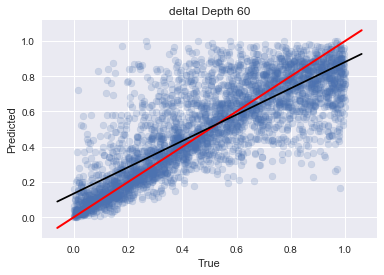

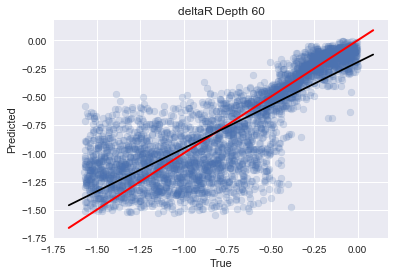

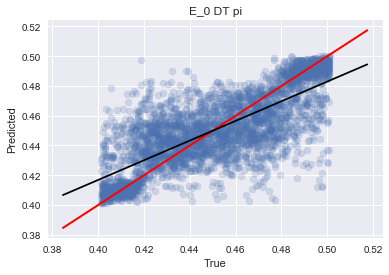

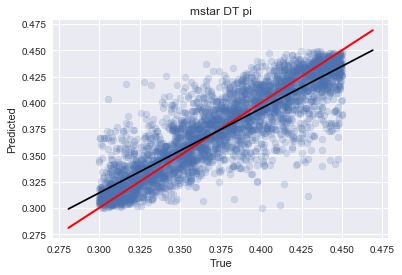

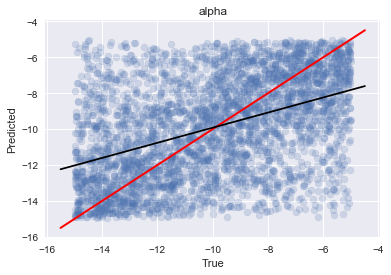

In [17]:
#Initialize the model
rs = 42
regr_DT_pi = DecisionTreeRegressor(max_depth=60, min_samples_leaf = 2, random_state = rs)

#Fit the model
regr_DT_pi.fit(X2_train, Y2_train)


#print(data1[data1['Regr - DT']>0.001])

#Use model to predict
predictions_DT_pi = regr_DT_pi.predict(X2_test)

scores_DT_pi = [r2_score(Y2_test['deltaI'], predictions_DT_pi[:,0]), r2_score(Y2_test['deltaR'], predictions_DT_pi[:,1]), r2_score(Y2_test['E_0'], predictions_DT_pi[:,2]), r2_score(Y2_test['mstar'], predictions_DT_pi[:,3]), r2_score(Y2_test['alpha'], predictions_DT_pi[:,4])]

#Plot results
plotSummary(Y2_test['deltaI'], predictions_DT_pi[:,0], 'deltaI Depth 60')
#myResiduals(Y_test['deltaI'], y_3[:,0])
plotSummary(Y2_test['deltaR'], predictions_DT_pi[:,1], 'deltaR Depth 60')
#myResiduals(Y_test['deltaR'], y_3[:,1])

plotSummary(Y2_test['E_0'], predictions_DT_pi[:,2], 'E_0 DT pi')
plotSummary(Y2_test['mstar'], predictions_DT_pi[:,3], 'mstar DT pi')
plotSummary(Y2_test['alpha'], predictions_DT_pi[:,4], 'alpha')

print(' ')

#Trying to understand the scoring
print('Regression - Decision Tree -  Score: ', regr_DT_pi.score(X2_test,Y2_test),', using max depth of 30')
print(' ')
regressor = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
print( 'Cross Validation Scores for regressor with max depth of ', regressor.max_depth, ' : ', cross_val_score(regressor, X1, Y1, cv=10))

### Random Forest - peak info


Score - Random Forest: 0.41993711871055583 for delta I/R 10
 
RMSE on test data: 0.13103894721470422 for  deltaI 10
R^2 Score on test data: 0.7954897959925458 for deltaI 10
 
RMSE on test data: 0.21337117196660055 for  deltaR 10
R^2 Score on test data: 0.7746158710699965 for deltaR 10
 
RMSE on test data: 0.011673698302991439 for  E_0
R^2 Score on test data: 0.8377902530657115 for E_0
 
RMSE on test data: 0.012993199062939192 for  mstar
R^2 Score on test data: 0.9112475605398924 for mstar
 
RMSE on test data: 2.212177890305444 for  alpha
R^2 Score on test data: 0.4072849039850599 for alpha


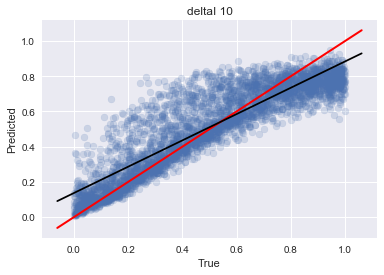

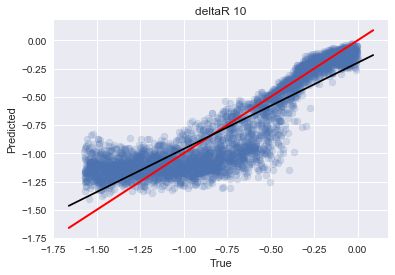

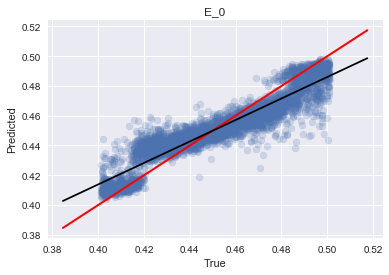

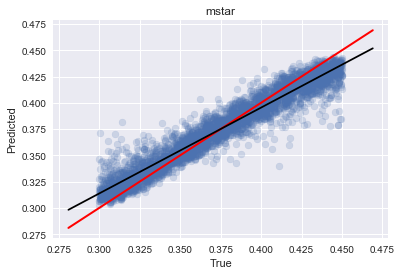

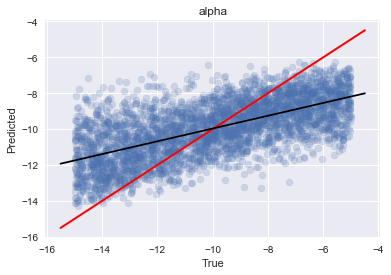

In [18]:
rs = 42
regr_RF_pi = RandomForestRegressor(max_depth = 40, n_estimators = 30, random_state=rs)

model_RF_pi = regr_RF_pi.fit(X2_train, Y2_train)

predictions_RF_pi = model_RF_pi.predict(X2_test)

scores_RF_pi = [r2_score(Y2_test['deltaI'], predictions_RF_pi[:,0]), r2_score(Y2_test['deltaR'], predictions_RF_pi[:,1]), r2_score(Y2_test['E_0'], predictions_RF_pi[:,2]), r2_score(Y2_test['mstar'], predictions_RF_pi[:,3]), r2_score(Y2_test['alpha'], predictions_RF_pi[:,4])]

print('')
print('Score - Random Forest:' , model_RF_pi.score(X2_test, Y2_test), 'for delta I/R 10')

plotSummary(Y2_test['deltaI'], predictions_RF_pi[:,0], 'deltaI 10')
plotSummary(Y2_test['deltaR'], predictions_RF_pi[:,1], 'deltaR 10')
plotSummary(Y2_test['E_0'], predictions_RF_pi[:,2], 'E_0')
plotSummary(Y2_test['mstar'], predictions_RF_pi[:,3], 'mstar')
plotSummary(Y2_test['alpha'], predictions_RF_pi[:,4], 'alpha')

### Independent Random Forests - peak info


Score - Random Forest: 0.8853925442086711 for delta I/R 10
 
RMSE on test data: 0.1521529976603448 for  deltaI 10
R^2 Score on test data: 0.8853925442086711 for deltaI 10
 
RMSE on test data: 0.07600848417275878 for  deltaR 10
R^2 Score on test data: 0.9311920950817093 for deltaR 10
 
RMSE on test data: 0.0038088889937218004 for  E_0
R^2 Score on test data: 0.9827314191604679 for E_0
 
RMSE on test data: 0.009217103903394279 for  mstar
R^2 Score on test data: 0.9553381116800761 for mstar
 
RMSE on test data: 2.1400166551007636 for  alpha
R^2 Score on test data: 0.44532294588821075 for alpha


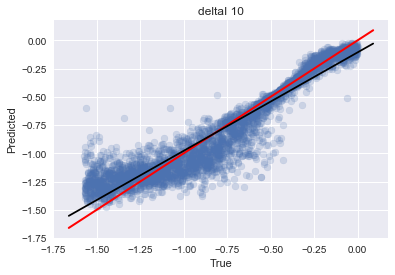

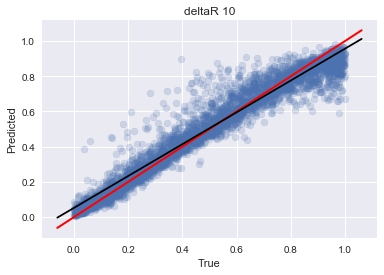

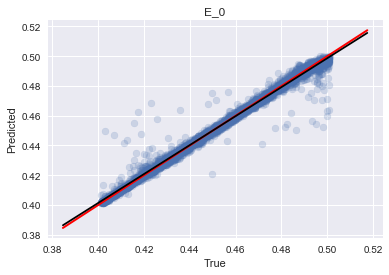

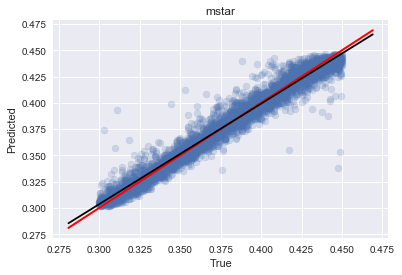

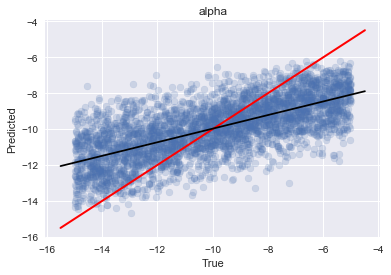

In [19]:
#Trying Independent Random Forest

rs = 42
md = 30
n = 30

regr_RF2_dr_pi = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_di_pi = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_E0_pi = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_mstar_pi = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_alpha_pi = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)

model_RF2_dr_pi = regr_RF2_dr_pi.fit(X2_train, Y2_train['deltaR'])
model_RF2_di_pi = regr_RF2_di_pi.fit(X2_train, Y2_train['deltaI'])
model_RF2_E0_pi = regr_RF2_E0_pi.fit(X2_train, Y2_train['E_0'])
model_RF2_mstar_pi = regr_RF2_mstar_pi.fit(X2_train, Y2_train['mstar'])
model_RF2_alpha_pi = regr_RF2_alpha_pi.fit(X2_train, Y2_train['alpha'])

predictions_RF2_dr_pi = model_RF2_dr_pi.predict(X2_test)
predictions_RF2_di_pi = model_RF2_di_pi.predict(X2_test)
predictions_RF2_E0_pi = model_RF2_E0_pi.predict(X2_test)
predictions_RF2_mstar_pi = model_RF2_mstar_pi.predict(X2_test)
predictions_RF2_alpha_pi = model_RF2_alpha_pi.predict(X2_test)

scores_RF2_pi = [r2_score(Y2_test['deltaI'], predictions_RF2_di_pi), r2_score(Y2_test['deltaR'], predictions_RF2_dr_pi), r2_score(Y2_test['E_0'], predictions_RF2_E0_pi), r2_score(Y2_test['mstar'], predictions_RF2_mstar_pi), r2_score(Y2_test['alpha'], predictions_RF2_alpha_pi)]

#importance_RF_10 = pd.Series(model_RF2.feature_importances_, index = X_train.columns)

print('')
print('Score - Random Forest:' , model_RF2_dr_pi.score(X2_test, Y2_test['deltaR']), 'for delta I/R 10')

plotSummary(Y2_test['deltaR'], predictions_RF2_dr_pi, 'deltaI 10')
plotSummary(Y2_test['deltaI'], predictions_RF2_di_pi, 'deltaR 10')
plotSummary(Y2_test['E_0'], predictions_RF2_E0_pi, 'E_0')
plotSummary(Y2_test['mstar'], predictions_RF2_mstar_pi, 'mstar')
plotSummary(Y2_test['alpha'], predictions_RF2_alpha_pi, 'alpha')


### AdaBoost Random Forests - peak info

 
RMSE on test data: 0.07592225284754535 for  AdaBoost Delta I
R^2 Score on test data: 0.9313481311132963 for AdaBoost Delta I
 
RMSE on test data: 0.15455552685751672 for  AdaBoost Delta R
R^2 Score on test data: 0.8817446152981114 for AdaBoost Delta R
 
RMSE on test data: 0.004153962766569254 for  AdaBoost E0
R^2 Score on test data: 0.9794607199999151 for AdaBoost E0
 
RMSE on test data: 0.009662046372714311 for  AdaBoost mstar
R^2 Score on test data: 0.9509220572380291 for AdaBoost mstar
 
RMSE on test data: 2.307591557671821 for  AdaBoost alpha
R^2 Score on test data: 0.3550533719313024 for AdaBoost alpha
Delta I AdaBoost Score: 0.9313481311132963
Delta R AdaBoost Score: 0.8817446152981115


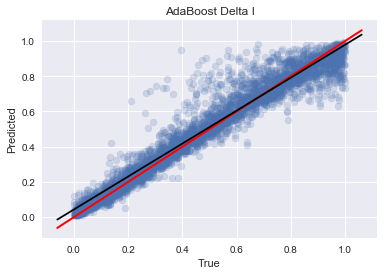

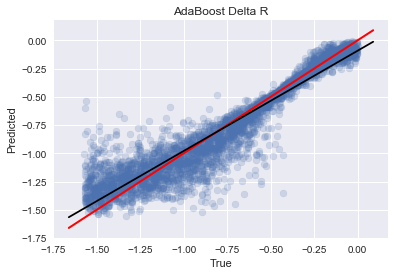

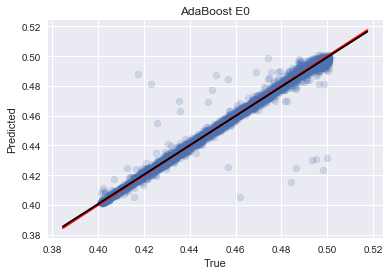

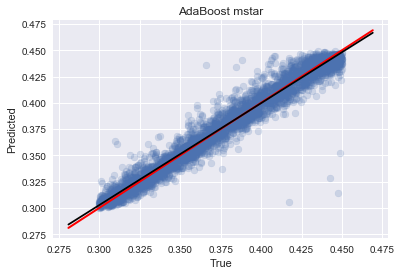

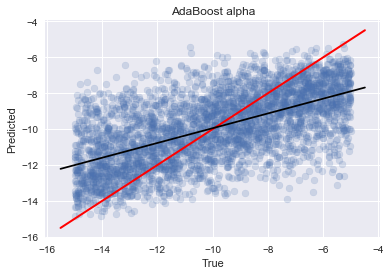

In [20]:
#Using AdaBoost Regression

from sklearn.ensemble import AdaBoostRegressor

rng = 42
md = 30
nest2 = 15

regr_AB_di_pi = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators=nest2, random_state=rng)
regr_AB_dr_pi = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md),n_estimators=nest2, random_state=rng)
regr_AB_E0_pi = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)
regr_AB_mstar_pi = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)
regr_AB_alpha_pi = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)

model_AB_di_pi = regr_AB_di_pi.fit(X2_train, Y2_train['deltaI'])
model_AB_dr_pi = regr_AB_dr_pi.fit(X2_train, Y2_train['deltaR'])
model_AB_E0_pi = regr_AB_E0_pi.fit(X2_train, Y2_train['E_0'])
model_AB_mstar_pi = regr_AB_mstar_pi.fit(X2_train, Y2_train['mstar'])
model_AB_alpha_pi = regr_AB_alpha_pi.fit(X2_train, Y2_train['alpha'])

predictions_AB_di_pi = model_AB_di_pi.predict(X2_test)
predictions_AB_dr_pi = model_AB_dr_pi.predict(X2_test)
predictions_AB_E0_pi = model_AB_E0_pi.predict(X2_test)
predictions_AB_mstar_pi = model_AB_mstar_pi.predict(X2_test)
predictions_AB_alpha_pi = model_AB_alpha_pi.predict(X2_test)

scores_AB_pi = [r2_score(Y2_test['deltaI'], predictions_AB_di_pi), r2_score(Y2_test['deltaR'], predictions_AB_dr_pi), r2_score(Y2_test['E_0'], predictions_AB_E0_pi), r2_score(Y2_test['mstar'], predictions_AB_mstar_pi), r2_score(Y2_test['alpha'], predictions_AB_alpha_pi)]

plotSummary(Y2_test['deltaI'], predictions_AB_di_pi, 'AdaBoost Delta I')
plotSummary(Y2_test['deltaR'], predictions_AB_dr_pi, 'AdaBoost Delta R')
plotSummary(Y2_test['E_0'], predictions_AB_E0_pi, 'AdaBoost E0')
plotSummary(Y2_test['mstar'], predictions_AB_mstar_pi, 'AdaBoost mstar')
plotSummary(Y2_test['alpha'], predictions_AB_alpha_pi, 'AdaBoost alpha')


print('Delta I AdaBoost Score:', model_AB_di_pi.score(X2_test, Y2_test['deltaI']))
print('Delta R AdaBoost Score:', model_AB_dr_pi.score(X2_test, Y2_test['deltaR']))



### Gradient Boosting Random Forests - peak info

 
RMSE on test data: 0.09538727720062569 for  GradientBoost Delta I
R^2 Score on test data: 0.8916334877863422 for GradientBoost Delta I
 
RMSE on test data: 0.2050225665668637 for  GradientBoost Delta R
R^2 Score on test data: 0.7919080991979627 for GradientBoost Delta R
 
RMSE on test data: 0.005436630010942693 for  GradientBoost E_0
R^2 Score on test data: 0.9648180770791825 for GradientBoost E_0
 
RMSE on test data: 0.01122455781205829 for  GradientBoost mstar
R^2 Score on test data: 0.9337651439273603 for GradientBoost mstar
 
RMSE on test data: 2.7733865899646633 for  GradientBoost alpha
R^2 Score on test data: 0.06840592816500646 for GradientBoost alpha
Delta I Gradient Boost Score: 0.8916334877863422
Delta R Gradient Boost Score: 0.7919080991979626


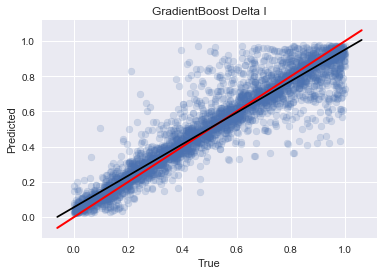

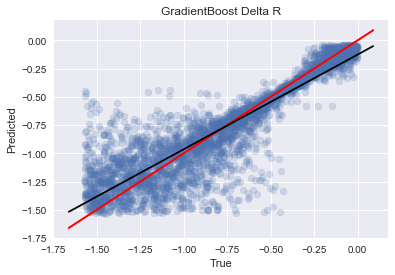

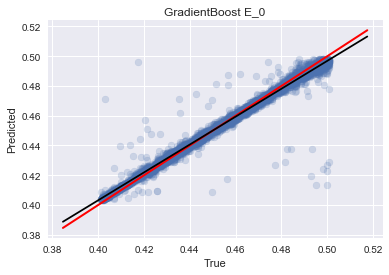

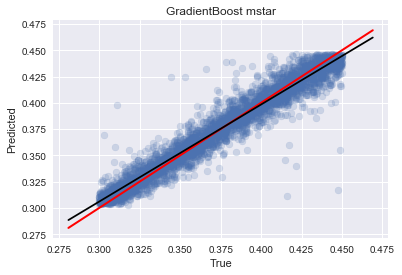

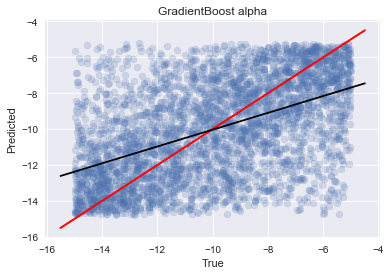

In [21]:
# Using Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

rng = 42

md = 50
nest2 = 30


regr_GB_di_pi = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_dr_pi = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_E0_pi = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)
regr_GB_mstar_pi = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)
regr_GB_alpha_pi = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)

model_GB_di_pi = regr_GB_di_pi.fit(X2_train, Y2_train['deltaI'])
model_GB_dr_pi = regr_GB_dr_pi.fit(X2_train, Y2_train['deltaR'])
model_GB_E0_pi = regr_GB_E0_pi.fit(X2_train, Y2_train['E_0'])
model_GB_mstar_pi = regr_GB_mstar_pi.fit(X2_train, Y2_train['mstar'])
model_GB_alpha_pi = regr_GB_alpha_pi.fit(X2_train, Y2_train['alpha'])

predictions_GB_di_pi = model_GB_di_pi.predict(X2_test)
predictions_GB_dr_pi = model_GB_dr_pi.predict(X2_test)
predictions_GB_E0_pi = model_GB_E0_pi.predict(X2_test)
predictions_GB_mstar_pi = model_GB_mstar_pi.predict(X2_test)
predictions_GB_alpha_pi = model_GB_alpha_pi.predict(X2_test)

scores_GB_pi = [r2_score(Y2_test['deltaI'], predictions_GB_di_pi), r2_score(Y2_test['deltaR'], predictions_GB_dr_pi), r2_score(Y2_test['E_0'], predictions_GB_E0_pi), r2_score(Y2_test['mstar'], predictions_GB_mstar_pi), r2_score(Y2_test['alpha'], predictions_GB_alpha_pi)]

plotSummary(Y2_test['deltaI'], predictions_GB_di_pi, 'GradientBoost Delta I')
plotSummary(Y2_test['deltaR'], predictions_GB_dr_pi, 'GradientBoost Delta R')
plotSummary(Y2_test['E_0'], predictions_GB_E0_pi, 'GradientBoost E_0')
plotSummary(Y2_test['mstar'], predictions_GB_mstar_pi, 'GradientBoost mstar')
plotSummary(Y2_test['alpha'], predictions_GB_alpha_pi, 'GradientBoost alpha')


print('Delta I Gradient Boost Score:', model_GB_di_pi.score(X2_test, Y2_test['deltaI']))
print('Delta R Gradient Boost Score:', model_GB_dr_pi.score(X2_test, Y2_test['deltaR']))



## Testing the Models on the Experimental Data



In [22]:
# Load the experimental data
col_names3 = peak_names + locs_names + width_names + prom_names
col_names4 = energy_names

exp_data_sp = pd.read_csv('Training_Data/Hexagon/HexagonExperimentalData062218_v8_specPoints.csv', header = None, names = col_names4)
exp_data_pi = pd.read_csv('Training_Data/Hexagon/HexagonExperimentalData062218_v8_peakinfo.csv', header = None, names = col_names3)

pred_phase_OLS_R_sp = results_OLS_R_sp.predict(exp_data_sp)
pred_phase_OLS_I_sp = results_OLS_I_sp.predict(exp_data_sp)
pred_phase_OLS_E0_sp = results_OLS_E0_sp.predict(exp_data_sp)
pred_phase_OLS_mstar_sp = results_OLS_mstar_sp.predict(exp_data_sp)
pred_phase_OLS_alpha_sp = results_OLS_alpha_sp.predict(exp_data_sp)

pred_phase_OLS_R_pi = results_OLS_R_pi.predict(exp_data_pi)
pred_phase_OLS_I_pi = results_OLS_I_pi.predict(exp_data_pi)
pred_phase_OLS_E0_pi = results_OLS_E0_pi.predict(exp_data_pi)
pred_phase_OLS_mstar_pi = results_OLS_mstar_pi.predict(exp_data_pi)
pred_phase_OLS_alpha_pi = results_OLS_alpha_pi.predict(exp_data_pi)

phases_OLS_sp = [pred_phase_OLS_I_sp[0], pred_phase_OLS_R_pi[0], pred_phase_OLS_E0_sp[0], pred_phase_OLS_mstar_sp[0], pred_phase_OLS_alpha_sp[0]]
phases_OLS_pi = [pred_phase_OLS_I_pi[0], pred_phase_OLS_R_pi[0], pred_phase_OLS_E0_pi[0], pred_phase_OLS_mstar_pi[0], pred_phase_OLS_alpha_pi[0]]

#pred_phase_DT_sp = np.append(regr_DT_sp.predict(exp_data_sp),r2_score(Y1_test['deltaI'], predictions_DT_sp[:,0])).reshape(3,1).T
#pred_phase_DT_sp = np.append(pred_phase_DT_sp, r2_score(Y1_test['deltaR'], predictions_DT_sp[:,1])).reshape(4,1).T
#pred_phase_DT = np.append(pred_phase_DT, r2_score(Y_test['scale_factor'], y_pred_DT[:,2]))
phases_DT_sp = regr_DT_sp.predict(exp_data_sp)
phases_DT_pi = regr_DT_pi.predict(exp_data_pi)

phases_RF_sp = regr_RF_sp.predict(exp_data_sp)
phases_RF_pi = regr_RF_pi.predict(exp_data_pi)

pred_phase_AB_R_sp = model_AB_dr_sp.predict(exp_data_sp)
pred_phase_AB_I_sp = model_AB_di_sp.predict(exp_data_sp)
pred_phase_AB_E0_sp = model_AB_E0_sp.predict(exp_data_sp)
pred_phase_AB_mstar_sp = model_AB_mstar_sp.predict(exp_data_sp)
pred_phase_AB_alpha_sp = model_AB_alpha_sp.predict(exp_data_sp)

pred_phase_AB_R_pi = model_AB_dr_pi.predict(exp_data_pi)
pred_phase_AB_I_pi = model_AB_di_pi.predict(exp_data_pi)
pred_phase_AB_E0_pi = model_AB_E0_pi.predict(exp_data_pi)
pred_phase_AB_mstar_pi = model_AB_mstar_pi.predict(exp_data_pi)
pred_phase_AB_alpha_pi = model_AB_alpha_pi.predict(exp_data_pi)

phases_AB_sp = [pred_phase_AB_I_sp[0], pred_phase_AB_R_sp[0], pred_phase_AB_E0_sp[0], pred_phase_AB_mstar_sp[0], pred_phase_AB_alpha_sp[0]]
phases_AB_pi = [pred_phase_AB_I_pi[0], pred_phase_AB_R_pi[0], pred_phase_AB_E0_pi[0], pred_phase_AB_mstar_pi[0], pred_phase_AB_alpha_pi[0]]

pred_phase_GB_di_sp = model_GB_di_sp.predict(exp_data_sp)
pred_phase_GB_dr_sp = model_GB_dr_sp.predict(exp_data_sp)
pred_phase_GB_E0_sp = model_GB_E0_sp.predict(exp_data_sp)
pred_phase_GB_mstar_sp = model_GB_mstar_sp.predict(exp_data_sp)
pred_phase_GB_alpha_sp = model_GB_alpha_sp.predict(exp_data_sp)

pred_phase_GB_di_pi = model_GB_di_pi.predict(exp_data_pi)
pred_phase_GB_dr_pi = model_GB_dr_pi.predict(exp_data_pi)
pred_phase_GB_E0_pi = model_GB_E0_pi.predict(exp_data_pi)
pred_phase_GB_mstar_pi = model_GB_mstar_pi.predict(exp_data_pi)
pred_phase_GB_alpha_pi = model_GB_alpha_pi.predict(exp_data_pi)

phases_GB_sp = [pred_phase_GB_di_sp[0], pred_phase_GB_dr_sp[0], pred_phase_GB_E0_sp[0], pred_phase_GB_mstar_sp[0], pred_phase_GB_alpha_sp[0]]
phases_GB_pi = [pred_phase_GB_di_pi[0], pred_phase_GB_dr_pi[0], pred_phase_GB_E0_pi[0], pred_phase_GB_mstar_pi[0], pred_phase_GB_alpha_pi[0]]

pred_phase_IRF_di_sp = model_RF2_di_sp.predict(exp_data_sp)
pred_phase_IRF_dr_sp = model_RF2_dr_sp.predict(exp_data_sp)
pred_phase_IRF_E0_sp = model_RF2_E0_sp.predict(exp_data_sp)
pred_phase_IRF_mstar_sp = model_RF2_mstar_sp.predict(exp_data_sp)
pred_phase_IRF_alpha_sp = model_RF2_alpha_sp.predict(exp_data_sp)

pred_phase_IRF_di_pi = model_RF2_di_pi.predict(exp_data_pi)
pred_phase_IRF_dr_pi = model_RF2_dr_pi.predict(exp_data_pi)
pred_phase_IRF_E0_pi = model_RF2_E0_pi.predict(exp_data_pi)
pred_phase_IRF_mstar_pi = model_RF2_mstar_pi.predict(exp_data_pi)
pred_phase_IRF_alpha_pi = model_RF2_alpha_pi.predict(exp_data_pi)

phases_IRF_sp = [pred_phase_IRF_di_sp[0], pred_phase_IRF_dr_sp[0], pred_phase_IRF_E0_sp[0], pred_phase_IRF_mstar_sp[0], pred_phase_IRF_alpha_sp[0]]
phases_IRF_pi = [pred_phase_IRF_di_pi[0], pred_phase_IRF_dr_pi[0], pred_phase_IRF_E0_pi[0], pred_phase_IRF_mstar_pi[0], pred_phase_IRF_alpha_pi[0]]

predictedPhases = pd.DataFrame([], columns = ['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'])

predictedPhases.loc['OLS_sp'] = phases_OLS_sp
predictedPhases.loc['OLS_pi'] = phases_OLS_pi
predictedPhases.loc['DT_sp'] = phases_DT_sp.tolist()[0]
predictedPhases.loc['DT_pi'] = phases_DT_pi.tolist()[0]
predictedPhases.loc['RF_sp'] = phases_RF_sp.tolist()[0]
predictedPhases.loc['RF_pi'] = phases_RF_pi.tolist()[0]
predictedPhases.loc['IRF_sp'] = phases_IRF_sp
predictedPhases.loc['IRF_pi'] = phases_IRF_pi
predictedPhases.loc['AB_sp'] = phases_AB_sp
predictedPhases.loc['AB_pi'] = phases_AB_pi
predictedPhases.loc['GB_sp'] = phases_GB_sp
predictedPhases.loc['GB_pi'] = phases_GB_pi

Scores = pd.DataFrame([], columns = ['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'])

Scores.loc['OLS_sp'] = scores_OLS
Scores.loc['OLS_pi'] = scores_OLS_pi
Scores.loc['DT_sp'] = scores_DT
Scores.loc['DT_pi'] = scores_DT_pi
Scores.loc['RF_sp'] = scores_RF
Scores.loc['RF_pi'] = scores_RF_pi
Scores.loc['IRF_sp'] = scores_RF2
Scores.loc['IRF_pi'] = scores_RF2_pi
Scores.loc['AB_sp'] = scores_AB
Scores.loc['AB_pi'] = scores_AB_pi
Scores.loc['GB_sp'] = scores_GB
Scores.loc['GB_pi'] = scores_GB_pi

predictedPhases

deltaI    deltaR       E_0     mstar      alpha
OLS_sp  0.499100 -0.514663  0.446255  0.378806  -9.039620
OLS_pi  0.488783 -0.514663  0.523592  0.553176 -10.666593
DT_sp   0.397896 -0.932210  0.422180  0.422970  -5.470700
DT_pi   0.499943 -0.135843  0.455527  0.363753 -14.050000
RF_sp   0.273434 -0.112634  0.446944  0.380334  -9.001033
RF_pi   0.436812 -0.113771  0.465665  0.412661 -13.235767
IRF_sp  0.222245 -0.066911  0.451947  0.371445  -9.710202
IRF_pi  0.475446 -0.035141  0.448147  0.374712 -12.798552
AB_sp   0.207650 -0.023582  0.446690  0.374770 -10.749000
AB_pi   0.479400 -0.039682  0.447760  0.375850 -13.112000
GB_sp   0.190712 -0.049965  0.443730  0.366959  -9.135061
GB_pi   0.572435 -0.085508  0.445919  0.370498 -13.928887

In [23]:
score_threshold = 0.95

avgE_0 = predictedPhases[Scores > score_threshold]['E_0'].mean()
avgmstar = predictedPhases[Scores > score_threshold]['mstar'].mean()

avgE_0, avgmstar

(0.4473656133834106, 0.37419414236111115)

In [24]:
predictedPhases[Scores>score_threshold]

deltaI  deltaR       E_0     mstar  alpha
OLS_sp     NaN     NaN       NaN       NaN    NaN
OLS_pi     NaN     NaN       NaN       NaN    NaN
DT_sp      NaN     NaN       NaN       NaN    NaN
DT_pi      NaN     NaN       NaN       NaN    NaN
RF_sp      NaN     NaN       NaN       NaN    NaN
RF_pi      NaN     NaN       NaN       NaN    NaN
IRF_sp     NaN     NaN  0.451947  0.371445    NaN
IRF_pi     NaN     NaN  0.448147  0.374712    NaN
AB_sp      NaN     NaN  0.446690  0.374770    NaN
AB_pi      NaN     NaN  0.447760  0.375850    NaN
GB_sp      NaN     NaN  0.443730       NaN    NaN
GB_pi      NaN     NaN  0.445919       NaN    NaN

## Made new training data with E_0 fixed. 

In [25]:
#Load the training data


peak_names = ['peak1', 'peak2', 'peak3', 'peak4']
locs_names = ['loc1', 'loc2', 'loc3', 'loc4']
width_names = ['width1', 'width2', 'width3','width4']
prom_names = ['prom1', 'prom2', 'prom3', 'prom4']

energy = (pd.read_csv('Training_Data/Hexagon/HexagonBias_v4.csv', header=None)*1000).round().astype(int)
energy_names = ['E_%i_mV' % item for item in list(energy.T[0])]

col_names2 = ['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha']+ peak_names + locs_names + width_names + prom_names

col_names1 = ['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'] + energy_names

data1 = pd.read_csv('Training_Data/Hexagon/HexagonTrainingData062818_v10_E0fixed_specPoints.csv', header = None, names = col_names1)
data2 = pd.read_csv('Training_Data/Hexagon/HexagonTrainingData062818_v10_E0fixed_peakinfo.csv', header = None, names = col_names2)

# Since E_0 is fixed don't include that

X3 = data1.drop(['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'], axis = 1)
Y3 = data1[['deltaI', 'deltaR', 'mstar', 'alpha']]

X4 = data2.drop(['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'], axis = 1)
Y4 = data2[['deltaI', 'deltaR', 'mstar', 'alpha']]

ts1 = 0.3
rs1 = 42

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size = ts1, random_state = rs1)
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size = ts1, random_state = rs1)

data1.head()

deltaI    deltaR     E_0    mstar   alpha  E_-400_mV  E_-398_mV  \
0  0.81472 -0.147980  0.4473  0.43701 -8.6764   0.161980   0.176570   
1  0.09754 -1.133300  0.4473  0.44363 -5.3511   0.032621   0.036163   
2  0.15761 -0.046193  0.4473  0.37281 -6.9972   0.360170   0.373990   
3  0.14189 -0.908300  0.4473  0.41883 -5.4051   0.033656   0.036668   
4  0.65574 -1.514700  0.4473  0.44010 -8.2126   0.088861   0.096974   

   E_-396_mV  E_-394_mV  E_-392_mV    ...     E_482_mV  E_484_mV  E_486_mV  \
0   0.195840   0.221070   0.254360    ...      0.81019   0.83237   0.85556   
1   0.040247   0.045382   0.053563    ...      0.11992   0.12054   0.12151   
2   0.392560   0.416620   0.446940    ...      1.06200   1.05860   1.05550   
3   0.039938   0.044134   0.050066    ...      0.46875   0.41733   0.37527   
4   0.107550   0.121530   0.140090    ...      0.56134   0.58892   0.61955   

   E_488_mV  E_490_mV  E_492_mV  E_494_mV  E_496_mV  E_498_mV  E_500_mV  
0   0.87910   0.90359   0.92774   0.95222   0.97615   1.00000   1.02340  
1   0.12320   0.12550   0.12805   0.13144   0.13622   0.14126   0.14672  
2   1.05250   1.04960   1.04720   1.04470   1.04240   1.04020   1.03840  
3   0.34107   0.31138   0.28706   0.26659   0.24842   0.23363   0.22098  
4   0.65425   0.69306   0.73552   0.78145   0.83063   0.88168   0.93441  

[5 rows x 456 columns]

### E0 Fixed Models

 
RMSE on test data: 2.4354897049941466 for  Delta I
R^2 Score on test data: -69.64587160544839 for Delta I
 
RMSE on test data: 2.0841656977677254 for  Delta R
R^2 Score on test data: -20.503855497630394 for Delta R
 
RMSE on test data: 2.0841656977677254 for  Delta R Zoomed In
R^2 Score on test data: -20.503855497630394 for Delta R Zoomed In
 
RMSE on test data: 0.06034572277043005 for  m star
R^2 Score on test data: -0.9144370970850586 for m star
 
RMSE on test data: 30.29230215347882 for  alpha
R^2 Score on test data: -110.14001570874423 for alpha
 
RMSE on test data: 0.1744747609391783 for  Delta I
R^2 Score on test data: 0.6374403947508118 for Delta I
 
RMSE on test data: 0.30061137186138825 for  Delta R
R^2 Score on test data: 0.5526343275276662 for Delta R
 
RMSE on test data: 0.016161005938267498 for  mstar
R^2 Score on test data: 0.8626954609838009 for mstar
 
RMSE on test data: 2.617964954570027 for  alpha
R^2 Score on test data: 0.1698940041307938 for alpha


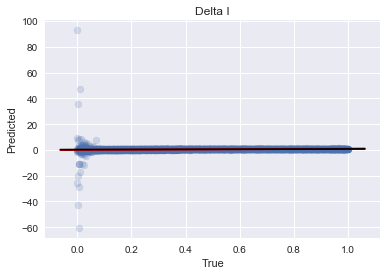

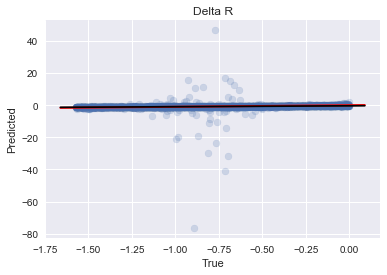

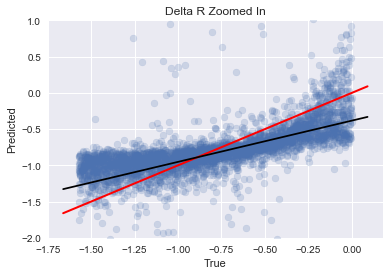

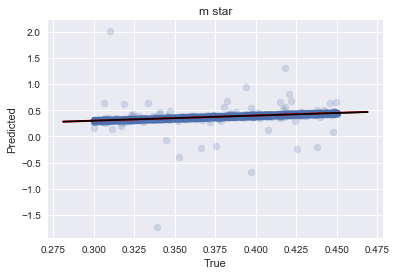

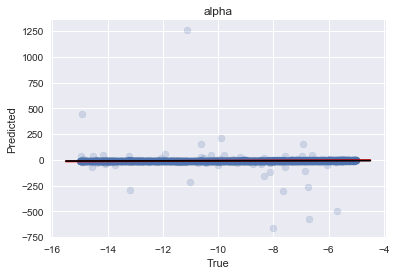

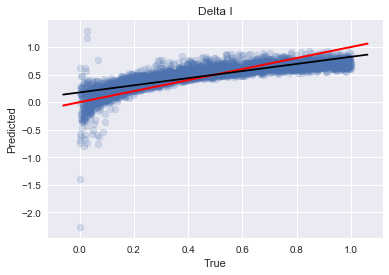

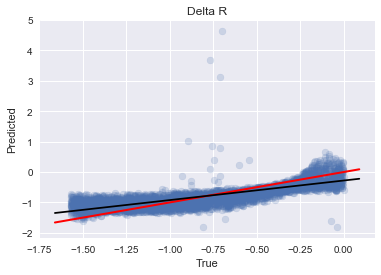

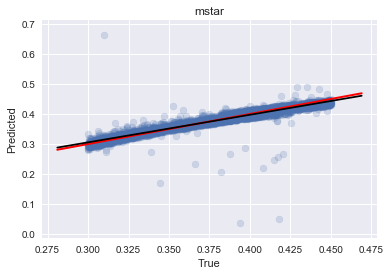

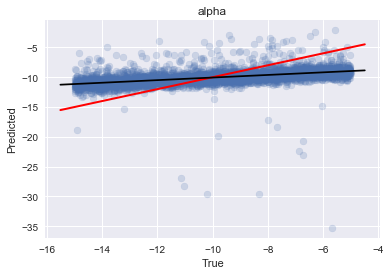

In [26]:
#Initialize and fit OLS model for deltaI 
E0_model_OLS_I_sp = sm.OLS(Y3_train['deltaI'], X3_train)
E0_model_OLS_R_sp = sm.OLS(Y3_train['deltaR'], X3_train)
E0_model_OLS_mstar_sp = sm.OLS(Y3_train['mstar'], X3_train)
E0_model_OLS_alpha_sp = sm.OLS(Y3_train['alpha'], X3_train)

E0_results_OLS_I_sp = E0_model_OLS_I_sp.fit()
E0_results_OLS_R_sp = E0_model_OLS_R_sp.fit()
E0_results_OLS_mstar_sp = E0_model_OLS_mstar_sp.fit()
E0_results_OLS_alpha_sp = E0_model_OLS_alpha_sp.fit()

#Make predictions on testing data
E0_predictions_OLS_I_sp = E0_results_OLS_I_sp.predict(X3_test) # make the predictions by the model
E0_predictions_OLS_R_sp = E0_results_OLS_R_sp.predict(X3_test)
E0_predictions_OLS_mstar_sp = E0_results_OLS_mstar_sp.predict(X3_test)
E0_predictions_OLS_alpha_sp = E0_results_OLS_alpha_sp.predict(X3_test)

E0_scores_OLS = [r2_score(Y3_test['deltaI'], E0_predictions_OLS_I_sp), 
                 r2_score(Y3_test['deltaR'], E0_predictions_OLS_R_sp),  
                 r2_score(Y3_test['mstar'], E0_predictions_OLS_mstar_sp),
                 r2_score(Y3_test['alpha'], E0_predictions_OLS_alpha_sp) ]

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y3_test['deltaI'], E0_predictions_OLS_I_sp,'Delta I')
#ylim([-1,5])
plotSummary(Y3_test['deltaR'], E0_predictions_OLS_R_sp, 'Delta R')
plotSummary(Y3_test['deltaR'], E0_predictions_OLS_R_sp, 'Delta R Zoomed In')
ylim([-2,1])
plotSummary(Y3_test['mstar'], E0_predictions_OLS_mstar_sp, 'm star')
plotSummary(Y3_test['alpha'], E0_predictions_OLS_alpha_sp, 'alpha')

#Initialize and fit OLS model for deltaI 
E0_model_OLS_I_pi = sm.OLS(Y4_train['deltaI'], X4_train)
E0_model_OLS_R_pi = sm.OLS(Y4_train['deltaR'], X4_train)
E0_model_OLS_mstar_pi = sm.OLS(Y2_train['mstar'], X4_train)
E0_model_OLS_alpha_pi = sm.OLS(Y2_train['alpha'], X4_train)

E0_results_OLS_I_pi = E0_model_OLS_I_pi.fit()
E0_results_OLS_R_pi = E0_model_OLS_R_pi.fit()
E0_results_OLS_mstar_pi = E0_model_OLS_mstar_pi.fit()
E0_results_OLS_alpha_pi = E0_model_OLS_alpha_pi.fit()

#Make predictions on testing data
E0_predictions_OLS_I_pi = E0_results_OLS_I_pi.predict(X4_test) # make the predictions by the model
E0_predictions_OLS_R_pi = E0_results_OLS_R_pi.predict(X4_test)
E0_predictions_OLS_mstar_pi = E0_results_OLS_mstar_pi.predict(X4_test)
E0_predictions_OLS_alpha_pi = E0_results_OLS_alpha_pi.predict(X4_test)

E0_scores_OLS_pi = [r2_score(Y4_test['deltaI'], E0_predictions_OLS_I_pi), 
                 r2_score(Y4_test['deltaR'], E0_predictions_OLS_R_pi), 
                 r2_score(Y4_test['mstar'], E0_predictions_OLS_mstar_pi), 
                 r2_score(Y4_test['alpha'], E0_predictions_OLS_alpha_pi)]

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y4_test['deltaI'], E0_predictions_OLS_I_pi,'Delta I')
#ylim([-1,5])
plotSummary(Y4_test['deltaR'], E0_predictions_OLS_R_pi, 'Delta R')

plotSummary(Y4_test['mstar'], E0_predictions_OLS_mstar_pi, 'mstar')
plotSummary(Y4_test['alpha'], E0_predictions_OLS_alpha_pi, 'alpha')


 
RMSE on test data: 0.21037168457560154 for  deltaI Depth 60
R^2 Score on test data: 0.4729051648600442 for deltaI Depth 60
 
RMSE on test data: 0.30445296596554594 for  deltaR Depth 60
R^2 Score on test data: 0.5411272542633696 for deltaR Depth 60
 
RMSE on test data: 0.013457626815189727 for  mstar
R^2 Score on test data: 0.9047894493983728 for mstar
 
RMSE on test data: 1.3815998182965195 for  alpha
R^2 Score on test data: 0.7688092634782097 for alpha
 
RMSE on test data: 0.20018055042234129 for  deltaI Depth 60
R^2 Score on test data: 0.5227367991616306 for deltaI Depth 60
 
RMSE on test data: 0.3083861221230117 for  deltaR Depth 60
R^2 Score on test data: 0.5291945330956493 for deltaR Depth 60
 
RMSE on test data: 0.009454526360091912 for  mstar DT pi
R^2 Score on test data: 0.9530075953626831 for mstar DT pi
 
RMSE on test data: 1.52366480836575 for  alpha
R^2 Score on test data: 0.7188197793180044 for alpha


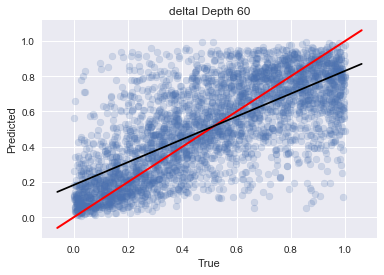

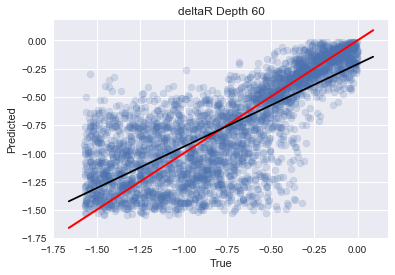

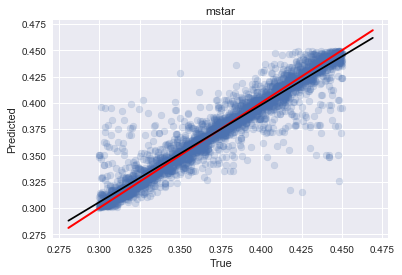

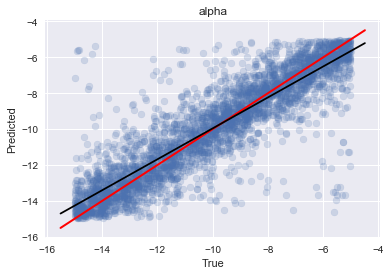

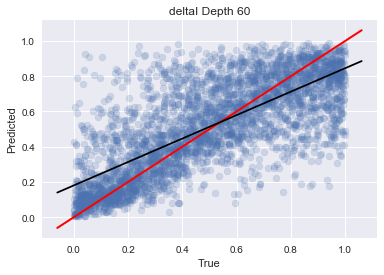

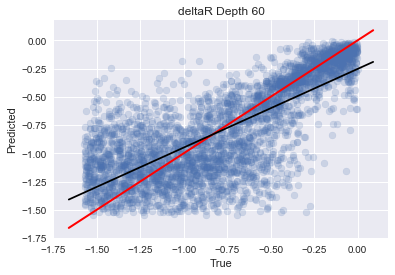

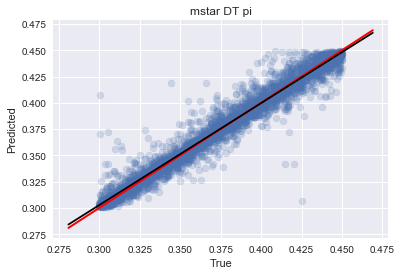

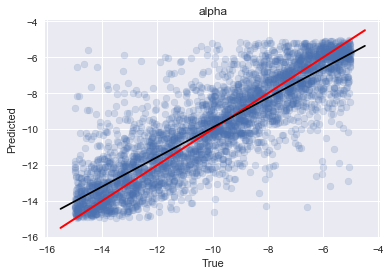

In [27]:
#Initialize the model
rs = 42
E0_regr_DT_sp = DecisionTreeRegressor(max_depth=60, min_samples_leaf = 2, random_state = rs)

#Fit the model
E0_regr_DT_sp = E0_regr_DT_sp.fit(X3_train, Y3_train)


#print(data1[data1['Regr - DT']>0.001])

#Use model to predict
E0_predictions_DT_sp = E0_regr_DT_sp.predict(X3_test)

E0_scores_DT = [r2_score(Y3_test['deltaI'], E0_predictions_DT_sp[:,0]), 
                r2_score(Y3_test['deltaR'], E0_predictions_DT_sp[:,1]), 
                r2_score(Y3_test['mstar'], E0_predictions_DT_sp[:,2]), 
                r2_score(Y3_test['alpha'], E0_predictions_DT_sp[:,3]) ]

#Plot results
plotSummary(Y3_test['deltaI'], E0_predictions_DT_sp[:,0], 'deltaI Depth 60')
#myResiduals(Y_test['deltaI'], y_3[:,0])
plotSummary(Y3_test['deltaR'], E0_predictions_DT_sp[:,1], 'deltaR Depth 60')
#myResiduals(Y_test['deltaR'], y_3[:,1])
plotSummary(Y3_test['mstar'], E0_predictions_DT_sp[:,2], 'mstar')
plotSummary(Y3_test['alpha'], E0_predictions_DT_sp[:,3], 'alpha')


#Initialize the model
rs = 42
E0_regr_DT_pi = DecisionTreeRegressor(max_depth=60, min_samples_leaf = 2, random_state = rs)

#Fit the model
E0_regr_DT_pi.fit(X4_train, Y4_train)


#print(data1[data1['Regr - DT']>0.001])

#Use model to predict
E0_predictions_DT_pi = E0_regr_DT_pi.predict(X4_test)

E0_scores_DT_pi = [r2_score(Y4_test['deltaI'], E0_predictions_DT_pi[:,0]), 
                r2_score(Y4_test['deltaR'], E0_predictions_DT_pi[:,1]), 
                r2_score(Y4_test['mstar'], E0_predictions_DT_pi[:,2]), 
                r2_score(Y4_test['alpha'], E0_predictions_DT_pi[:,3])]

#Plot results
plotSummary(Y4_test['deltaI'], E0_predictions_DT_pi[:,0], 'deltaI Depth 60')
#myResiduals(Y_test['deltaI'], y_3[:,0])
plotSummary(Y4_test['deltaR'], E0_predictions_DT_pi[:,1], 'deltaR Depth 60')
#myResiduals(Y_test['deltaR'], y_3[:,1])

plotSummary(Y4_test['mstar'], E0_predictions_DT_pi[:,2], 'mstar DT pi')
plotSummary(Y4_test['alpha'], E0_predictions_DT_pi[:,3], 'alpha')


Score - Random Forest: 0.9015409711264196 for delta I/R 10
 
RMSE on test data: 0.1452508227431088 for  deltaI 10
R^2 Score on test data: 0.7487237781066397 for deltaI 10
 
RMSE on test data: 0.22321247562757646 for  deltaR 10
R^2 Score on test data: 0.7533456529769178 for deltaR 10
 
RMSE on test data: 0.007285899430527383 for  mstar
R^2 Score on test data: 0.9720929160259815 for mstar
 
RMSE on test data: 0.8776625194525545 for  alpha
R^2 Score on test data: 0.9067044352223872 for alpha
 
RMSE on test data: 0.15025788960859288 for  deltaI 10
R^2 Score on test data: 0.7311012637897575 for deltaI 10
 
RMSE on test data: 0.24631706285719693 for  deltaR 10
R^2 Score on test data: 0.6996408684041179 for deltaR 10
 
RMSE on test data: 0.006946778702911872 for  mstar
R^2 Score on test data: 0.9746303168592153 for mstar
 
RMSE on test data: 1.15920448010162 for  alpha
R^2 Score on test data: 0.8372481269043547 for alpha


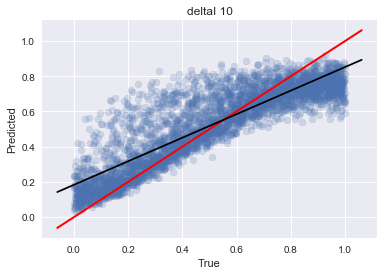

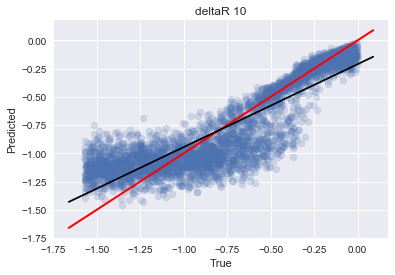

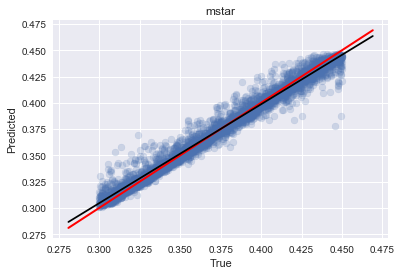

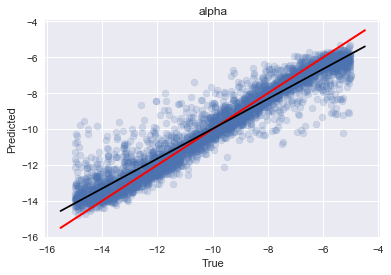

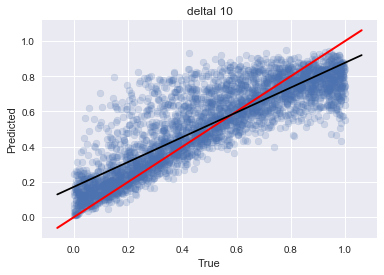

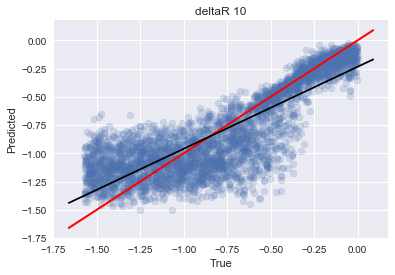

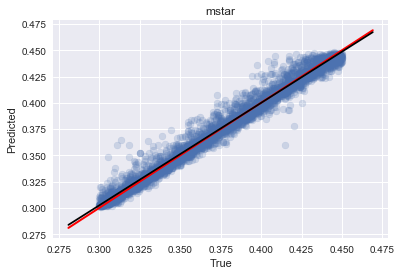

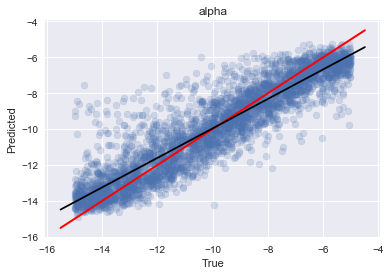

In [28]:
rs = 42
E0_regr_RF_sp = RandomForestRegressor(max_depth = 40, n_estimators = 30, random_state=rs)

E0_model_RF_sp = E0_regr_RF_sp.fit(X3_train, Y3_train)

E0_predictions_RF_sp = E0_model_RF_sp.predict(X3_test)

E0_scores_RF = [r2_score(Y3_test['deltaI'], E0_predictions_RF_sp[:,0]), 
                r2_score(Y3_test['deltaR'], E0_predictions_RF_sp[:,1]), 
                r2_score(Y3_test['mstar'], E0_predictions_RF_sp[:,2]), 
                r2_score(Y3_test['alpha'], E0_predictions_RF_sp[:,3])]

print('')
print('Score - Random Forest:' , E0_model_RF_sp.score(X3_test, Y3_test), 'for delta I/R 10')

plotSummary(Y3_test['deltaI'], E0_predictions_RF_sp[:,0], 'deltaI 10')
plotSummary(Y3_test['deltaR'], E0_predictions_RF_sp[:,1], 'deltaR 10')
plotSummary(Y3_test['mstar'], E0_predictions_RF_sp[:,2], 'mstar')
plotSummary(Y3_test['alpha'], E0_predictions_RF_sp[:,3], 'alpha')

rs = 42
E0_regr_RF_pi = RandomForestRegressor(max_depth = 40, n_estimators = 30, random_state=rs)

E0_model_RF_pi = E0_regr_RF_pi.fit(X4_train, Y4_train)

E0_predictions_RF_pi = E0_model_RF_pi.predict(X4_test)

E0_scores_RF_pi = [r2_score(Y4_test['deltaI'], E0_predictions_RF_pi[:,0]), 
                   r2_score(Y4_test['deltaR'], E0_predictions_RF_pi[:,1]), 
                   r2_score(Y4_test['mstar'], E0_predictions_RF_pi[:,2]), 
                   r2_score(Y4_test['alpha'], E0_predictions_RF_pi[:,3])]

plotSummary(Y4_test['deltaI'], E0_predictions_RF_pi[:,0], 'deltaI 10')
plotSummary(Y4_test['deltaR'], E0_predictions_RF_pi[:,1], 'deltaR 10')
plotSummary(Y4_test['mstar'], E0_predictions_RF_pi[:,2], 'mstar')
plotSummary(Y4_test['alpha'], E0_predictions_RF_pi[:,3], 'alpha')


 
RMSE on test data: 0.22966398576063202 for  deltaI 10
R^2 Score on test data: 0.7388815009573554 for deltaI 10
 
RMSE on test data: 0.14703520347549878 for  deltaR 10
R^2 Score on test data: 0.7425120881684903 for deltaR 10
 
RMSE on test data: 0.00946213624084815 for  mstar
R^2 Score on test data: 0.9529319172166584 for mstar
 
RMSE on test data: 1.768077611407698 for  alpha
R^2 Score on test data: 0.6213756477330679 for alpha
 
RMSE on test data: 0.10298524072148951 for  deltaI 10
R^2 Score on test data: 0.9474948598141953 for deltaI 10
 
RMSE on test data: 0.04433769575101432 for  deltaR 10
R^2 Score on test data: 0.9765868186384715 for deltaR 10
 
RMSE on test data: 0.006114460290864935 for  mstar
R^2 Score on test data: 0.9803453926325497 for mstar
 
RMSE on test data: 1.1528707251661747 for  alpha
R^2 Score on test data: 0.8390217817336114 for alpha


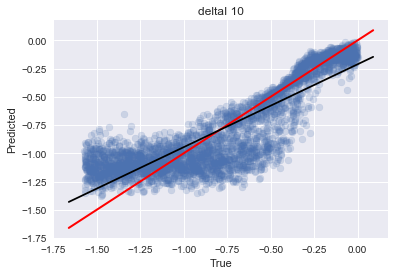

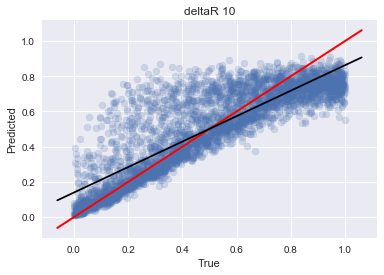

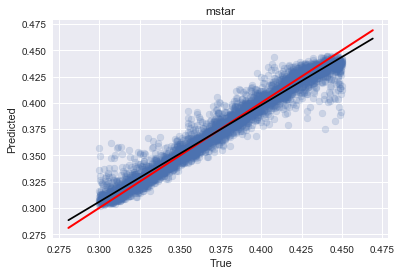

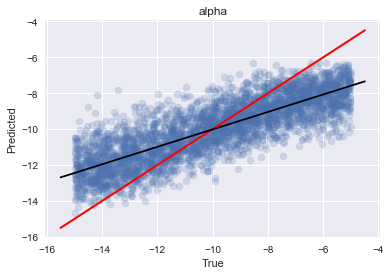

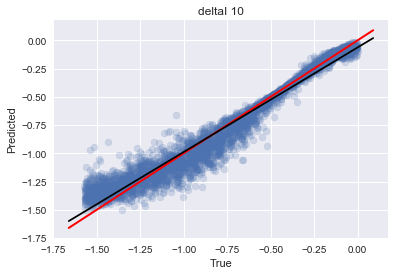

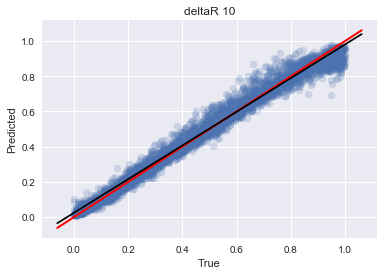

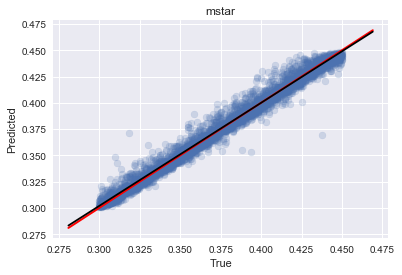

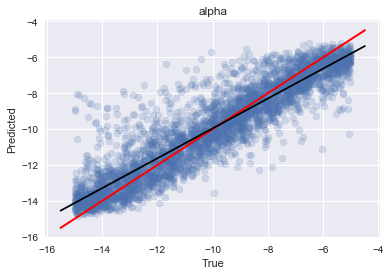

In [29]:
#Trying Independent Random Forest

rs = 42
md = 40
n = 40

E0_regr_RF2_dr_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
E0_regr_RF2_di_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
E0_regr_RF2_E0_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
E0_regr_RF2_mstar_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
E0_regr_RF2_alpha_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)


E0_model_RF2_dr_sp = E0_regr_RF2_dr_sp.fit(X1_train, Y1_train['deltaR'])
E0_model_RF2_di_sp = E0_regr_RF2_di_sp.fit(X1_train, Y1_train['deltaI'])
E0_model_RF2_E0_sp = E0_regr_RF2_E0_sp.fit(X1_train, Y1_train['E_0'])
E0_model_RF2_mstar_sp = E0_regr_RF2_mstar_sp.fit(X1_train, Y1_train['mstar'])
E0_model_RF2_alpha_sp = E0_regr_RF2_alpha_sp.fit(X1_train, Y1_train['alpha'])

E0_predictions_RF2_dr_sp = E0_model_RF2_dr_sp.predict(X1_test)
E0_predictions_RF2_di_sp = E0_model_RF2_di_sp.predict(X1_test)
E0_predictions_RF2_E0_sp = E0_model_RF2_E0_sp.predict(X1_test)
E0_predictions_RF2_mstar_sp = E0_model_RF2_mstar_sp.predict(X1_test)
E0_predictions_RF2_alpha_sp = E0_model_RF2_alpha_sp.predict(X1_test)

scores_RF2 = [r2_score(Y3_test['deltaI'], E0_predictions_RF2_di_sp), r2_score(Y3_test['deltaR'], E0_predictions_RF2_dr_sp), r2_score(Y3_test['mstar'], E0_predictions_RF2_mstar_sp), r2_score(Y3_test['alpha'], E0_predictions_RF2_alpha_sp)]

#importance_RF_10 = pd.Series(model_RF2.feature_importances_, index = X_train.columns)

plotSummary(Y3_test['deltaR'], E0_predictions_RF2_dr_sp, 'deltaI 10')
plotSummary(Y3_test['deltaI'], E0_predictions_RF2_di_sp, 'deltaR 10')
plotSummary(Y3_test['mstar'], E0_predictions_RF2_mstar_sp, 'mstar')
plotSummary(Y3_test['alpha'], E0_predictions_RF2_alpha_sp, 'alpha')

#Trying Independent Random Forest

rs = 42
md = 30
n = 30

E0_regr_RF2_dr_pi = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
E0_regr_RF2_di_pi = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
E0_regr_RF2_mstar_pi = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
E0_regr_RF2_alpha_pi = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)

E0_model_RF2_dr_pi = E0_regr_RF2_dr_pi.fit(X4_train, Y4_train['deltaR'])
E0_model_RF2_di_pi = E0_regr_RF2_di_pi.fit(X4_train, Y4_train['deltaI'])
E0_model_RF2_mstar_pi = E0_regr_RF2_mstar_pi.fit(X4_train, Y4_train['mstar'])
E0_model_RF2_alpha_pi = E0_regr_RF2_alpha_pi.fit(X4_train, Y4_train['alpha'])

E0_predictions_RF2_dr_pi = E0_model_RF2_dr_pi.predict(X4_test)
E0_predictions_RF2_di_pi = E0_model_RF2_di_pi.predict(X4_test)
E0_predictions_RF2_mstar_pi = E0_model_RF2_mstar_pi.predict(X4_test)
E0_predictions_RF2_alpha_pi = E0_model_RF2_alpha_pi.predict(X4_test)

scores_RF2_pi = [r2_score(Y4_test['deltaI'], E0_predictions_RF2_di_pi), 
                 r2_score(Y4_test['deltaR'], E0_predictions_RF2_dr_pi), 
                 r2_score(Y4_test['mstar'], E0_predictions_RF2_mstar_pi), 
                 r2_score(Y4_test['alpha'], E0_predictions_RF2_alpha_pi)]

plotSummary(Y4_test['deltaR'], E0_predictions_RF2_dr_pi, 'deltaI 10')
plotSummary(Y4_test['deltaI'], E0_predictions_RF2_di_pi, 'deltaR 10')
plotSummary(Y4_test['mstar'], E0_predictions_RF2_mstar_pi, 'mstar')
plotSummary(Y4_test['alpha'], E0_predictions_RF2_alpha_pi, 'alpha')




 
RMSE on test data: 0.1195247122057366 for  AdaBoost Delta I
R^2 Score on test data: 0.8298509201635482 for AdaBoost Delta I
 
RMSE on test data: 0.1867004891892801 for  AdaBoost Delta R
R^2 Score on test data: 0.8274389569580091 for AdaBoost Delta R
 
RMSE on test data: 0.005378170630878838 for  AdaBoost mstar
R^2 Score on test data: 0.9847939200961817 for AdaBoost mstar
 
RMSE on test data: 0.8620656606417297 for  AdaBoost alpha
R^2 Score on test data: 0.9099908655725397 for AdaBoost alpha
 
RMSE on test data: 0.04597091079129381 for  AdaBoost Delta I
R^2 Score on test data: 0.9748301627196897 for AdaBoost Delta I
 
RMSE on test data: 0.10140778633020339 for  AdaBoost Delta R
R^2 Score on test data: 0.9490910136003526 for AdaBoost Delta R
 
RMSE on test data: 0.006047129566508348 for  AdaBoost mstar
R^2 Score on test data: 0.9807758714186763 for AdaBoost mstar
 
RMSE on test data: 1.232798126916362 for  AdaBoost alpha
R^2 Score on test data: 0.8159271123544433 for AdaBoost alpha


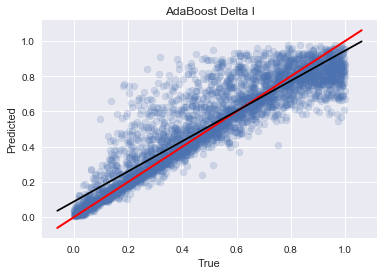

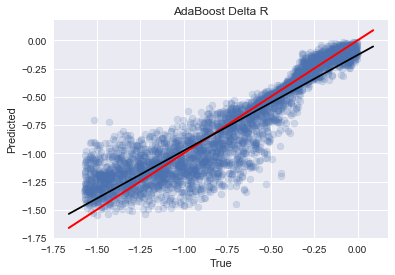

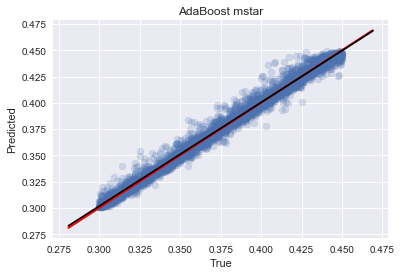

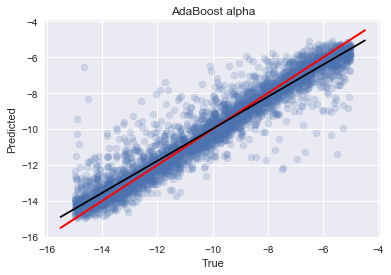

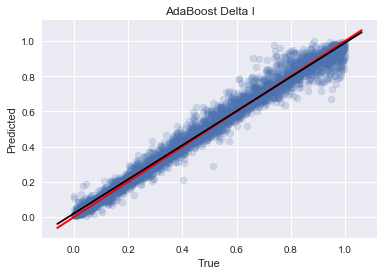

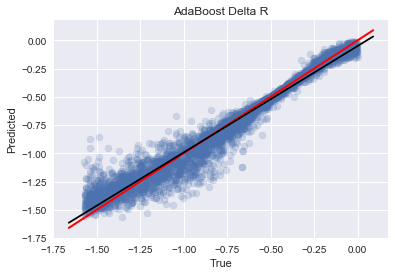

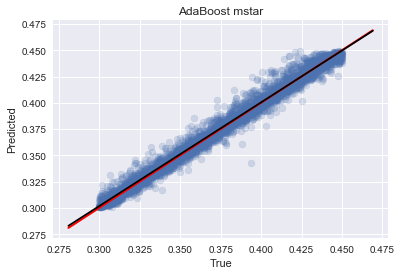

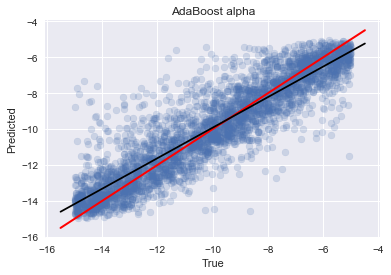

In [30]:
#Using AdaBoost Regression

from sklearn.ensemble import AdaBoostRegressor

rng = 42
md = 30
nest2 = 15

E0_regr_AB_di_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators=nest2, random_state=rng)
E0_regr_AB_dr_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md),n_estimators=nest2, random_state=rng)
E0_regr_AB_mstar_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)
E0_regr_AB_alpha_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)

E0_model_AB_di_sp = E0_regr_AB_di_sp.fit(X3_train, Y3_train['deltaI'])
E0_model_AB_dr_sp = E0_regr_AB_dr_sp.fit(X3_train, Y3_train['deltaR'])
E0_model_AB_mstar_sp = E0_regr_AB_mstar_sp.fit(X3_train, Y3_train['mstar'])
E0_model_AB_alpha_sp = E0_regr_AB_alpha_sp.fit(X3_train, Y3_train['alpha'])

E0_predictions_AB_di_sp = E0_model_AB_di_sp.predict(X3_test)
E0_predictions_AB_dr_sp = E0_model_AB_dr_sp.predict(X3_test)
E0_predictions_AB_mstar_sp = E0_model_AB_mstar_sp.predict(X3_test)
E0_predictions_AB_alpha_sp = E0_model_AB_alpha_sp.predict(X3_test)

scores_AB = [r2_score(Y3_test['deltaI'], E0_predictions_AB_di_sp), 
             r2_score(Y3_test['deltaR'], E0_predictions_AB_dr_sp), 
             r2_score(Y3_test['mstar'], E0_predictions_AB_mstar_sp), 
             r2_score(Y3_test['alpha'], E0_predictions_AB_alpha_sp)]

plotSummary(Y3_test['deltaI'], E0_predictions_AB_di_sp, 'AdaBoost Delta I')
plotSummary(Y3_test['deltaR'], E0_predictions_AB_dr_sp, 'AdaBoost Delta R')
plotSummary(Y3_test['mstar'], E0_predictions_AB_mstar_sp, 'AdaBoost mstar')
plotSummary(Y3_test['alpha'], E0_predictions_AB_alpha_sp, 'AdaBoost alpha')

#Using AdaBoost Regression

from sklearn.ensemble import AdaBoostRegressor

rng = 42
md = 30
nest2 = 15

E0_regr_AB_di_pi = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators=nest2, random_state=rng)
E0_regr_AB_dr_pi = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md),n_estimators=nest2, random_state=rng)
E0_regr_AB_mstar_pi = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)
E0_regr_AB_alpha_pi = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)

E0_model_AB_di_pi = E0_regr_AB_di_pi.fit(X4_train, Y4_train['deltaI'])
E0_model_AB_dr_pi = E0_regr_AB_dr_pi.fit(X4_train, Y4_train['deltaR'])
E0_model_AB_mstar_pi = E0_regr_AB_mstar_pi.fit(X4_train, Y4_train['mstar'])
E0_model_AB_alpha_pi = E0_regr_AB_alpha_pi.fit(X4_train, Y4_train['alpha'])

E0_predictions_AB_di_pi = E0_model_AB_di_pi.predict(X4_test)
E0_predictions_AB_dr_pi = E0_model_AB_dr_pi.predict(X4_test)
E0_predictions_AB_mstar_pi = E0_model_AB_mstar_pi.predict(X4_test)
E0_predictions_AB_alpha_pi = E0_model_AB_alpha_pi.predict(X4_test)

scores_AB_pi = [r2_score(Y4_test['deltaI'], E0_predictions_AB_di_pi), 
                r2_score(Y4_test['deltaR'], E0_predictions_AB_dr_pi), 
                r2_score(Y4_test['mstar'], E0_predictions_AB_mstar_pi), 
                r2_score(Y4_test['alpha'], E0_predictions_AB_alpha_pi)]

plotSummary(Y4_test['deltaI'], E0_predictions_AB_di_pi, 'AdaBoost Delta I')
plotSummary(Y4_test['deltaR'], E0_predictions_AB_dr_pi, 'AdaBoost Delta R')
plotSummary(Y4_test['mstar'], E0_predictions_AB_mstar_pi, 'AdaBoost mstar')
plotSummary(Y4_test['alpha'], E0_predictions_AB_alpha_pi, 'AdaBoost alpha')




 
RMSE on test data: 0.15344413285255307 for  GradientBoost Delta I
R^2 Score on test data: 0.7195762672648268 for GradientBoost Delta I
 
RMSE on test data: 0.24202096756589764 for  GradientBoost Delta R
R^2 Score on test data: 0.7100268201031424 for GradientBoost Delta R
 
RMSE on test data: 0.00670021112090661 for  GradientBoost mstar
R^2 Score on test data: 0.9763992888586418 for GradientBoost mstar
 
RMSE on test data: 1.2518206362046507 for  GradientBoost alpha
R^2 Score on test data: 0.8102026664054846 for GradientBoost alpha
 
RMSE on test data: 0.06024703107010247 for  GradientBoost Delta I
R^2 Score on test data: 0.956769974514359 for GradientBoost Delta I
 
RMSE on test data: 0.12789142094804884 for  GradientBoost Delta R
R^2 Score on test data: 0.9190280364866653 for GradientBoost Delta R
 
RMSE on test data: 0.0073719129409773295 for  GradientBoost mstar
R^2 Score on test data: 0.9714301138192897 for GradientBoost mstar
 
RMSE on test data: 1.4389538256688392 for  Gradient

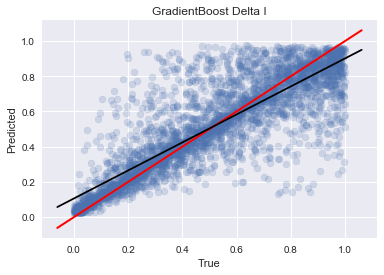

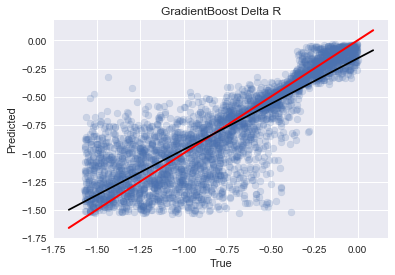

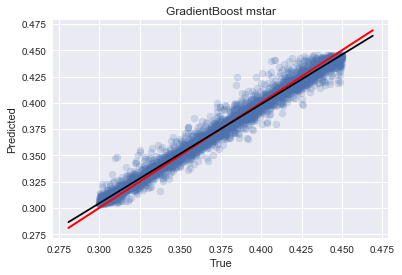

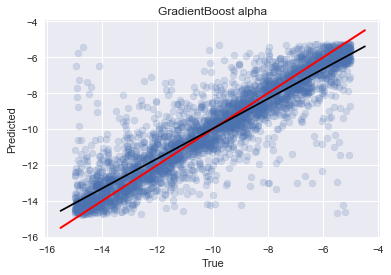

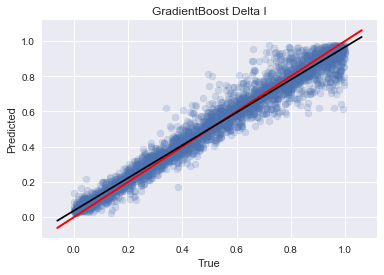

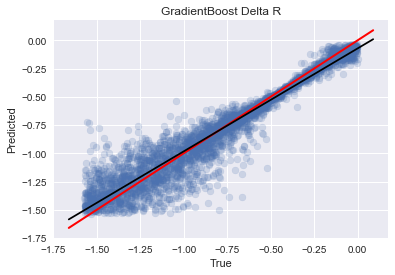

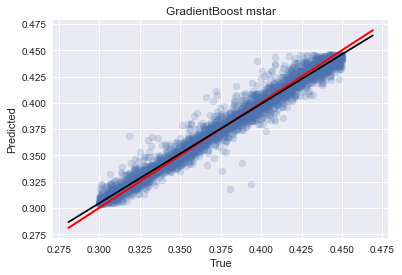

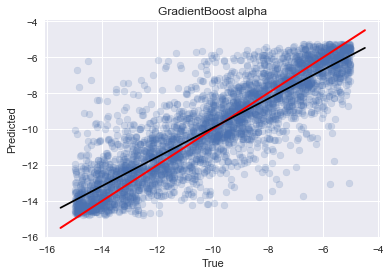

In [31]:
# Using Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

rng = 42

md = 50
nest2 = 30


E0_regr_GB_di_sp = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
E0_regr_GB_dr_sp = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
E0_regr_GB_E0_sp = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)
E0_regr_GB_mstar_sp = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)
E0_regr_GB_alpha_sp = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)

E0_model_GB_di_sp = E0_regr_GB_di_sp.fit(X3_train, Y3_train['deltaI'])
E0_model_GB_dr_sp = E0_regr_GB_dr_sp.fit(X3_train, Y3_train['deltaR'])
E0_model_GB_mstar_sp = E0_regr_GB_mstar_sp.fit(X3_train, Y3_train['mstar'])
E0_model_GB_alpha_sp = E0_regr_GB_alpha_sp.fit(X3_train, Y3_train['alpha'])


E0_predictions_GB_di_sp = E0_model_GB_di_sp.predict(X3_test)
E0_predictions_GB_dr_sp = E0_model_GB_dr_sp.predict(X3_test)
E0_predictions_GB_mstar_sp = E0_model_GB_mstar_sp.predict(X3_test)
E0_predictions_GB_alpha_sp = E0_model_GB_alpha_sp.predict(X3_test)

E0_scores_GB = [r2_score(Y3_test['deltaI'], E0_predictions_GB_di_sp), r2_score(Y3_test['deltaR'], E0_predictions_GB_dr_sp), r2_score(Y3_test['mstar'], E0_predictions_GB_mstar_sp), r2_score(Y3_test['alpha'], E0_predictions_GB_alpha_sp)]

plotSummary(Y3_test['deltaI'], E0_predictions_GB_di_sp, 'GradientBoost Delta I')
plotSummary(Y3_test['deltaR'], E0_predictions_GB_dr_sp, 'GradientBoost Delta R')
plotSummary(Y3_test['mstar'], E0_predictions_GB_mstar_sp, 'GradientBoost mstar')
plotSummary(Y3_test['alpha'], E0_predictions_GB_alpha_sp, 'GradientBoost alpha')


# Using Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

rng = 42

md = 50
nest2 = 30


E0_regr_GB_di_pi = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
E0_regr_GB_dr_pi = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
E0_regr_GB_mstar_pi = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)
E0_regr_GB_alpha_pi = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)

E0_model_GB_di_pi = E0_regr_GB_di_pi.fit(X4_train, Y4_train['deltaI'])
E0_model_GB_dr_pi = E0_regr_GB_dr_pi.fit(X4_train, Y4_train['deltaR'])
E0_model_GB_mstar_pi = E0_regr_GB_mstar_pi.fit(X4_train, Y4_train['mstar'])
E0_model_GB_alpha_pi = E0_regr_GB_alpha_pi.fit(X4_train, Y4_train['alpha'])

E0_predictions_GB_di_pi = E0_model_GB_di_pi.predict(X4_test)
E0_predictions_GB_dr_pi = E0_model_GB_dr_pi.predict(X4_test)
E0_predictions_GB_mstar_pi = E0_model_GB_mstar_pi.predict(X4_test)
E0_predictions_GB_alpha_pi = E0_model_GB_alpha_pi.predict(X4_test)

scores_GB_pi = [r2_score(Y4_test['deltaI'], E0_predictions_GB_di_pi), 
                r2_score(Y4_test['deltaR'], E0_predictions_GB_dr_pi), 
                r2_score(Y4_test['mstar'], E0_predictions_GB_mstar_pi), 
                r2_score(Y4_test['alpha'], E0_predictions_GB_alpha_pi)]

plotSummary(Y4_test['deltaI'], E0_predictions_GB_di_pi, 'GradientBoost Delta I')
plotSummary(Y4_test['deltaR'], E0_predictions_GB_dr_pi, 'GradientBoost Delta R')
plotSummary(Y4_test['mstar'], E0_predictions_GB_mstar_pi, 'GradientBoost mstar')
plotSummary(Y4_test['alpha'], E0_predictions_GB_alpha_pi, 'GradientBoost alpha')

